In [1]:
import pandas as pd
import numpy as np
import sys
import os
path = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/'
print(path)
sys.path.append(path)
save_folder = os.path.join(path, 'figures/')
folder_ERRA = os.path.join(path, 'output_ERRA_forGAMCR/')
import pickle
import matplotlib.pyplot as plt
import copy
import torch
from datetime import timedelta, datetime
import matplotlib.dates as mdates

import sys
sys.path.append('/mydata/watres/quentin/code/FLOW/hourly_analysis/')
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os
import GAMCR

def filter_dates(dates, site, all_data=False):
    dates = pd.to_datetime(dates)
    if not(all_data):
        idxsyear = np.where(np.array([date.year for date in dates])>=2018)[0]
    if site == '46':
        low_month = 7
        up_month = 9
    elif site in ['3','44','112']:
        low_month = 6
        up_month = 10
    else:
        low_month = 5
        up_month = 10
    idxsmonth_low = np.where(np.array([date.month for date in dates])>=low_month)[0]
    #np.where(dates.apply(lambda x: x.month>=low_month))[0]
    #idxsmonth_up = np.where(dates.apply(lambda x: x.month<=up_month))[0]
    idxsmonth_up = np.where(np.array([date.month for date in dates])<=up_month)[0]
    if not(all_data):
        idxs = np.intersect1d(idxsyear, idxsmonth_low)
    else:
        idxs = idxsmonth_low
    idxs = np.intersect1d(idxs, idxsmonth_up)
    return idxs


def nse(observed, simulated):
    """
    Calculate the Nash-Sutcliffe Efficiency (NSE).
    
    Parameters:
    observed (array-like): Array of observed values.
    simulated (array-like): Array of simulated values.
    
    Returns:
    float: NSE value.
    """
    observed = np.array(observed)
    simulated = np.array(simulated)
    
    # Calculate the mean of the observed data
    mean_observed = np.mean(observed)
    
    # Compute the numerator and denominator of the NSE formula
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - mean_observed) ** 2)
    
    # Compute NSE
    nse_value = 1 - (numerator / denominator)
    
    return nse_value


import matplotlib.cm as cm
import colorsys
def rainbow_colors(K = 10):
    colors = cm.rainbow(np.linspace(0, 1, K))
    # Reduce brightness by converting RGB to HSV and adjusting Value (V)
    adjusted_colors = []
    for color in colors:
        r, g, b, _ = color
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        v = v * 0.8  # Reduce brightness to 70% of original
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        adjusted_colors.append((r, g, b))
    return adjusted_colors


log_mode = False

from get_data_from_ERRA import *
dicERRA = get_data_from_ERRA()
all_GISID = list(dicERRA.keys())
all_GISID = ['44', '48', '50', '58', '88','112']
colors = rainbow_colors(len(all_GISID))

/tmp/ipykernel_140/1423277739.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/


In [3]:
import pandas as pd
import numpy as np
import sys
from joblib import Parallel, delayed
sys.path.append('/mydata/watres/quentin/code/FLOW/hourly_analysis/')
import GAMCR
data_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/'
import os
import pickle
import matplotlib.pyplot as plt
import copy
import torch

from get_data_from_ERRA import *
dicERRA = get_data_from_ERRA()
all_GISID = list(dicERRA.keys())

all_data = True

all_GISID = ['44', '48', '50', '58', '88','112']
for site in all_GISID: #['184','47','112','150', '27']: 
    name_model = '{0}_best_model_minprecip.pkl'.format(site)
    model = GAMCR.model.GAMCR(lam=0.1)
    datapath = os.path.join(data_folder, site, name_model)
    model.load_model(datapath)


GISID2name = {'48':'Sonceboz',
              '44':'Euthal',
               '50':'Salmsach',
               '58':'Chiasso',
               '88':'Magliaso',
               '112':'Lavertezzo'
             }
                

In [65]:
df

index          q    p     timeyear                 date      tmin  \
0            0   2.087000  0.0  2005.000000  2005-01-01 00:00:00 -3.622277   
1            1   2.091333  0.0  2005.000114  2005-01-01 01:00:00 -3.622277   
2            2   2.102500  0.0  2005.000228  2005-01-01 02:00:00 -3.622277   
3            3   2.117000  0.0  2005.000342  2005-01-01 03:00:00 -3.622277   
4            4   2.117000  0.0  2005.000457  2005-01-01 04:00:00 -3.622277   
...        ...        ...  ...          ...                  ...       ...   
137324  137324  21.682167  0.0  2020.666211  2020-08-31 20:00:00  6.153403   
137325  137325  20.978500  0.0  2020.666325  2020-08-31 21:00:00  6.153403   
137326  137326  20.358667  0.0  2020.666439  2020-08-31 22:00:00  6.153403   
137327  137327  19.704000  0.0  2020.666553  2020-08-31 23:00:00  6.153403   
137328  137328  19.350000  0.0  2020.666667  2020-09-01 00:00:00  6.555819   

             tmax       tabs       pet  
0        1.800587  -0.864332  0.368511  
1        1.800587  -0.864332  0.368511  
2        1.800587  -0.864332  0.368511  
3        1.800587  -0.864332  0.368511  
4        1.800587  -0.864332  0.368511  
...           ...        ...       ...  
137324  12.974155   9.060051  2.049938  
137325  12.974155   9.060051  2.049938  
137326  12.974155   9.060051  2.049938  
137327  12.974155   9.060051  2.049938  
137328  15.016634  10.220050  2.361477  

[137329 rows x 9 columns]

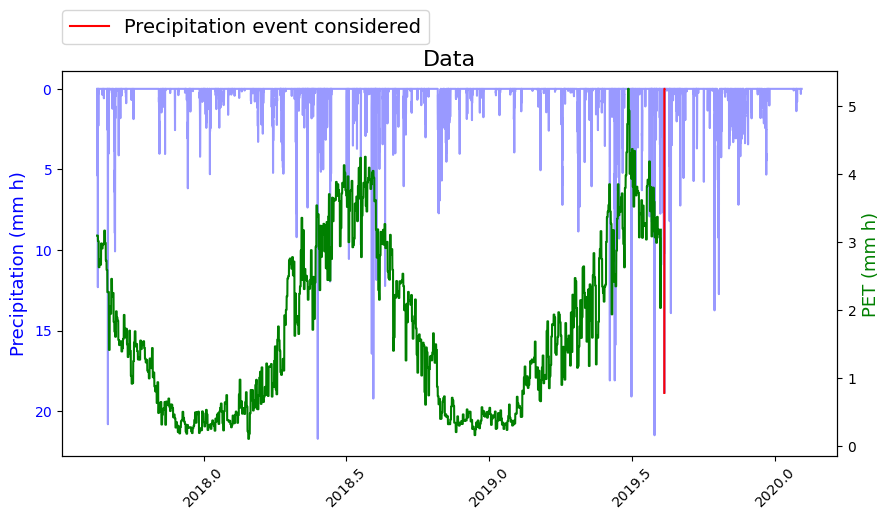

In [176]:
datapath = os.path.join(data_folder, site)
df = pd.read_csv(os.path.join(datapath, 'data_{0}.txt'.format(GISID)))

from matplotlib.ticker import ScalarFormatter


max_time_points = 24*30*13
fig, ax1 = plt.subplots(figsize=(10,5))
precipitation = df['p'][-max_time_points-24*30*24:-max_time_points+24*30*6].to_numpy()
dates = df['timeyear'][-max_time_points-24*30*24:-max_time_points+24*30*6].to_numpy()
pet = df['pet'][-max_time_points:]
streamflow = df['q'][-max_time_points:]
# Plot precipitation with inverted y-axis on the first axis
ax1.plot(dates, precipitation, color='blue', alpha=0.4)
idx = np.argmax(precipitation[24*30*24:])
idx += 24*30*24
ax1.plot(dates[idx:(idx+3)], precipitation[idx:(idx+3)], color='red', label='Precipitation event considered')

ax1.invert_yaxis()  # Invert the y-axis to make precipitation start from the top
ax1.set_ylabel('Precipitation (mm h)', color='blue', fontsize=13)
ax1.tick_params(axis='y', labelcolor='blue')
#ax1.set_xlabel('Date', fontsize=15)

pet = df['pet'][-max_time_points-24*30*24:-max_time_points]
dates = df['timeyear'][-max_time_points-24*30*24:-max_time_points].to_numpy()

streamflow = df['q'][-max_time_points:]
# Plot precipitation with inverted y-axis on the first axis
ax2 = ax1.twinx()
ax2.plot(dates, pet, color='green')
ax2.set_ylabel('PET (mm h)', color='green', fontsize=13)

#ax2.plot(dates, streamflow, color='orange', label='Streamflow')
# Add a legend to the plot
ax1.legend(loc=(0,1.07), fontsize=14)
ax1.set_title('Data', fontsize=16)

ax1.tick_params(axis='x', rotation=45)
plt.ticklabel_format(useOffset=False)
#plt.legend(fontsize=16)
plt.savefig("event.png", dpi=200, bbox_inches='tight')

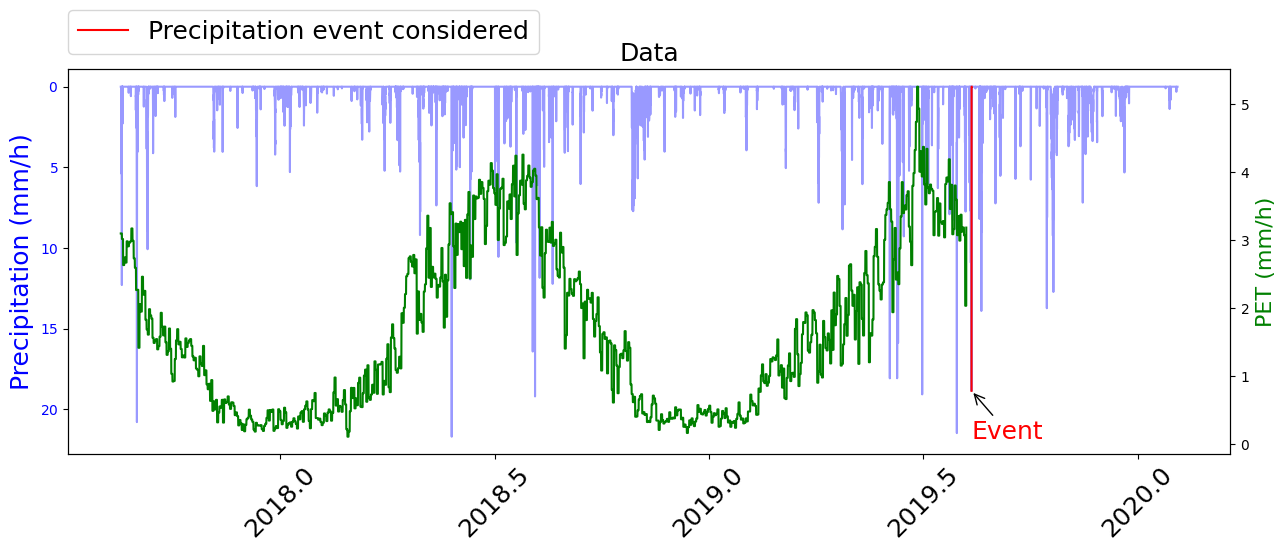

In [182]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
datapath = os.path.join(data_folder, site)
df = pd.read_csv(os.path.join(datapath, 'data_{0}.txt'.format(GISID)))

from matplotlib.ticker import ScalarFormatter

# Define time range and extract variables
max_time_points = 24 * 30 * 13
precipitation = df['p'][-max_time_points - 24 * 30 * 24 : -max_time_points + 24 * 30 * 6].to_numpy()
dates = df['timeyear'][-max_time_points - 24 * 30 * 24 : -max_time_points + 24 * 30 * 6].to_numpy()
pet = df['pet'][-max_time_points - 24 * 30 * 24 : -max_time_points].to_numpy()

# Identify the peak precipitation event
idx = np.argmax(precipitation[24 * 30 * 24:])
idx += 24 * 30 * 24

# Plot the data
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot precipitation with inverted y-axis
ax1.plot(dates, precipitation, color='blue', alpha=0.4)
ax1.plot(dates[idx : (idx + 3)], precipitation[idx : (idx + 3)], color='red', label='Precipitation event considered')
ax1.annotate(
    "Event",
    xy=(dates[idx], precipitation[idx]),
    xytext=(dates[idx], precipitation[idx] + 3),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=18,
    color='red'
)

ax1.invert_yaxis()  # Invert the y-axis
ax1.set_ylabel('Precipitation (mm/h)', color='blue', fontsize=18)
ax1.tick_params(axis='y', labelcolor='blue')
#ax1.set_xlabel('Date')

# Plot PET on the second y-axis
ax2 = ax1.twinx()
dates = df['timeyear'][-max_time_points-24*30*24:-max_time_points].to_numpy()

ax2.plot(dates, pet, color='green')
ax2.set_ylabel('PET (mm/h)', color='green', fontsize=16)

# Add a legend to the plot
ax1.legend(loc=(0, 1.04), fontsize=18)
ax1.set_title('Data', fontsize=18)
# Format x-axis for better readability
ax1.tick_params(axis='x', rotation=45, labelsize=18)
ax1.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Save the figure
plt.savefig("event.png", dpi=200, bbox_inches='tight')
plt.show()


In [83]:
dates

127969    2019.600114
127970    2019.600228
127971    2019.600342
127972    2019.600457
127973    2019.600571
             ...     
132284    2020.092441
132285    2020.092555
132286    2020.092668
132287    2020.092782
132288    2020.092896
Name: timeyear, Length: 4320, dtype: float64

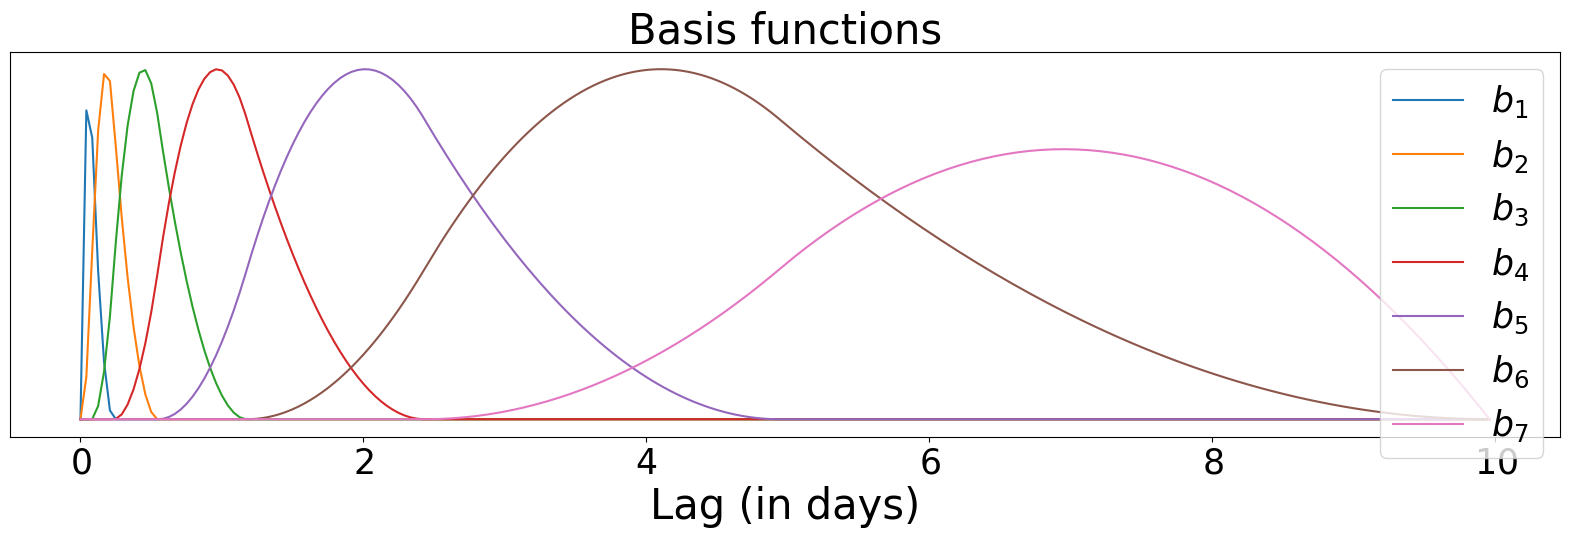

In [191]:
plt.figure(figsize=(20,5))
x = np.arange(0,model.basis_splines.shape[1])/24
for i in range(model.L):
    plt.plot(x, model.basis_splines[i,:], label="$b_{{{}}}$".format(i+1))
plt.xlabel("Lag (in days)", fontsize=30)
plt.legend(fontsize=25)
plt.yticks([])
plt.title('Basis functions', fontsize=30)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=25)

plt.savefig("basis_splines.png", dpi=200, bbox_inches='tight')

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_140/2468189865.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$T\mapsto h_{t}(T)$", fontsize=30)


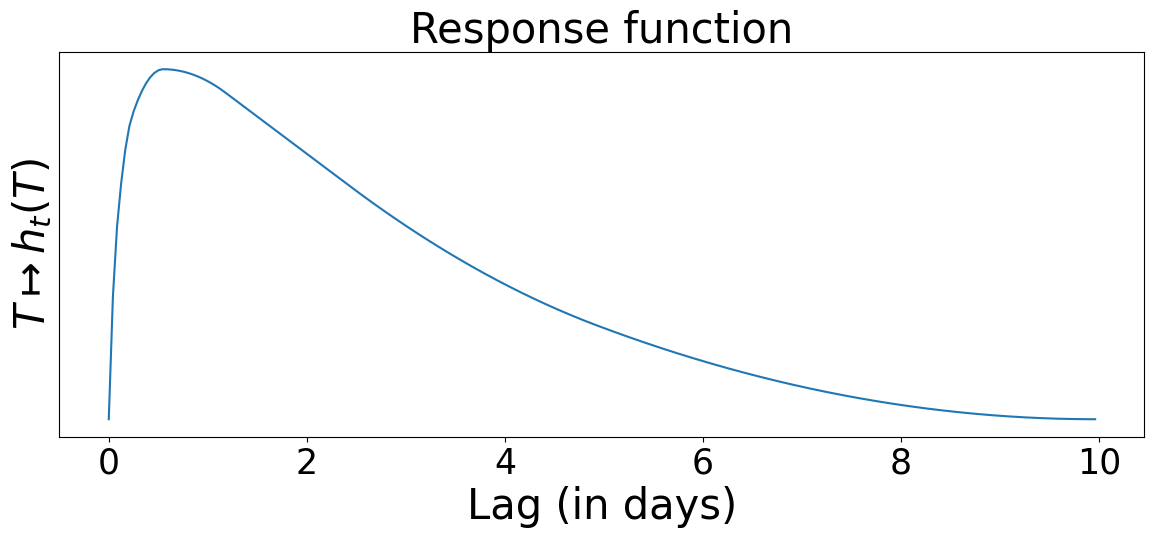

In [4]:
plt.figure(figsize=(14,5))
coeffs = np.array([0.2,0.4,0.5,0.5,0.4,0.2,0])
x = np.arange(0,model.basis_splines.shape[1])/24
res = np.zeros(len(x))
for i in range(model.L):
    res += coeffs[i] * model.basis_splines[i,:]
plt.plot(x, res)
plt.yticks([])
plt.xlabel("Lag (in days)", fontsize=30)
plt.ylabel("$T\mapsto h_{t}(T)$", fontsize=30)
plt.title('Response function', fontsize=30)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=25)

plt.savefig("response.png", dpi=200, bbox_inches='tight')

In [54]:
os.getcwd()

'/mydata/watres/quentin/code/FLOW/data'

# Weighted RRDs for GAMCR and ERRA: all sites on the same figure

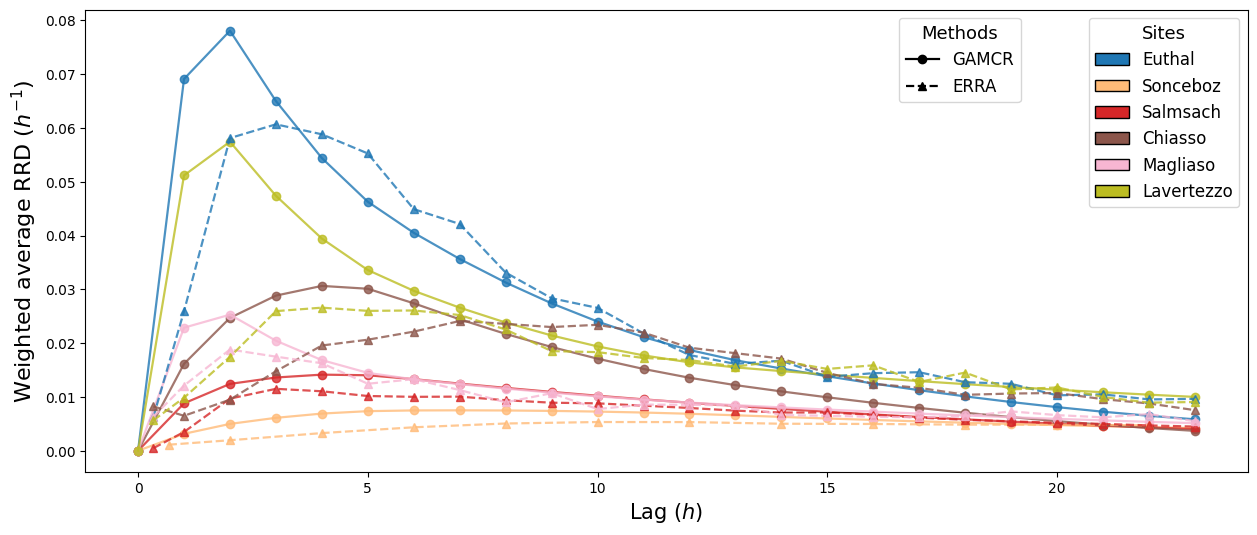

In [38]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

linewidth = 1.6
color_map = plt.cm.tab20  # Use tab20 colormap for distinct colors
markers = {'GAMCR': 'o', 'ERRA': '^'}  # Define markers for methods
colors = [color_map(i / len(all_GISID)) for i in range(len(all_GISID))]  # Generate colors

# Create legend patches for GISIDs
legend_patches = []

for method in ['GAMCR', 'ERRA']:
    for ii, GISID in enumerate(all_GISID):
        wavgRRD = np.load(os.path.join(path, GISID, 'results_training_paper', 'weighted_avg_RRD.npy')).reshape(-1)
        
        ########## Transfer functions
        maxlag = int(24 * 1)
        lagsERRA = dicERRA[GISID]['lagtime_RRD']
        if lagsERRA[-1] <= maxlag:
            idx_erra = len(lagsERRA)
        else:
            idx_erra = np.where(lagsERRA <= maxlag)[0][-1]

        # Plot the curves with unique colors per GISID and method-specific styles
        if log_mode:
            if method == 'GAMCR':
                axs.plot([i  for i in range(maxlag)], np.log(wavgRRD[:maxlag]), 
                         color=colors[ii], lw=1.3, marker=markers[method], alpha=0.8)
            else:
                axs.plot(dicERRA[GISID]['lagtime_RRD'][:idx_erra] , 
                         np.log(dicERRA[GISID]['wtd_avg_RRD_p'][:idx_erra]), 
                         color=colors[ii], lw=0.9, linestyle='--', marker=markers[method], alpha=0.8)
        else:
            if method == 'GAMCR':
                axs.plot([i  for i in range(maxlag)], wavgRRD[:maxlag], 
                         color=colors[ii], lw=linewidth, marker=markers[method], alpha=0.8)
            else:
                axs.plot(dicERRA[GISID]['lagtime_RRD'][:idx_erra] , 
                         dicERRA[GISID]['wtd_avg_RRD_p'][:idx_erra], 
                         color=colors[ii], linestyle='--', lw=linewidth, marker=markers[method], alpha=0.8)
        
        # Add a patch for each GISID if not already added
        if len(legend_patches) < len(all_GISID):
            legend_patches.append(Patch(facecolor=colors[ii], edgecolor='black', label=GISID2name[GISID]))

    
# Add the GISID color blocks to the legend
gisid_legend = axs.legend(handles=legend_patches, loc='upper right',  title='Sites', fontsize=12, title_fontsize=13)

method_legend_lines = [
    Line2D([0], [0], color='black', lw=linewidth, marker=markers['GAMCR'], label='GAMCR'),
    Line2D([0], [0], color='black', linestyle='--', lw=linewidth, marker=markers['ERRA'], label='ERRA')
]
method_legend = axs.legend(handles=method_legend_lines, loc=(0.7,0.8), fontsize=12, title="Methods", title_fontsize=13)
axs.add_artist(gisid_legend)  # Add GISID legend manually so it doesn't get overwritten


plt.xlabel('Lag ($h$)', fontsize=15)
plt.ylabel('Weighted average RRD ($h^{-1}$)', fontsize=16)

plt.savefig(os.path.join(path, 'all_sites.png'), dpi=200, bbox_inches='tight')

# GAMCR NRF heights vs precipitation intensity

In [136]:
GAMCR.resultsanalysis.show_vs_precip_intensity(path, all_GISID, weighted=True, log_ordo=False, dataERRA=None, stats2show=['peak'])

FileNotFoundError: [Errno 2] No such file or directory: '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/44/result/H_weighted_avg.npy'

# ERRA NRF heights vs precipitation intensity

In [16]:

def show_vs_precip_intensity(global_path, all_sites, weighted=True, log_ordo=False, dataERRA=None, show_GAMCR=True, show_sites_labels=True, figsave=None, stats2show=None, results_name_folder='result'):
    if stats2show is None:
        stats2show = ['area', 'peak', 'mean', 'peaklag']
    site2tf = {}
    import math
    color_map = plt.cm.tab20  # Use tab20 colormap for distinct colors
    markers = {'GAMCR': 'o', 'ERRA': '^', 'true':'s' }  # Define markers for methods
    colors = [color_map(i / len(all_sites)) for i in range(len(all_sites))]  # Generate colors
    linestyle = {'GAMCR':'--', 'ERRA':'-.', 'true':'-'}

    id_site = 0

    site2area_esti = {}
    site2peak_esti = {}
    site2mean_esti = {}
    site2peaklag_esti = {}

    site2quantiles = {}
    
    site2area_esti_noweight = {}
    site2peak_esti_noweight = {}
    site2mean_esti_noweight = {}
    site2peaklag_esti_noweight = {}

    site2area_true = {}
    site2peak_true = {}
    site2mean_true = {}
    site2peaklag_true = {}

    site2quantiles_true = {}
    
    site2area_true_noweight = {}
    site2peak_true_noweight = {}
    site2mean_true_noweight = {}
    site2peaklag_true_noweight = {}

    for site in all_sites:
        folder = os.path.join(global_path, site, results_name_folder)

        H_weighted_avgbis = np.load(os.path.join(folder, 'H_weighted_avg.npy'))
        H_avgbis = np.load(os.path.join(folder, 'H_avg.npy'))
        m = H_avgbis.shape[1]
        
        with open(os.path.join(folder, 'groups_precip.pkl'), 'rb') as handle:
            groups_precip = pickle.load(handle)
            nJ = len(groups_precip)
        with open(os.path.join(folder, 'groups_wetness.pkl'), 'rb') as handle:
            groups_wetness = pickle.load(handle)
            nQ = len(groups_wetness)
        with open(os.path.join(folder, 'group2p_range.pkl'), 'rb') as handle:
            group2p_range = pickle.load(handle)
        with open(os.path.join(folder, 'group2q_range.pkl'), 'rb') as handle:
            group2q_range = pickle.load(handle)
        with open(os.path.join(folder, 'group2nbpoints.pkl'), 'rb') as handle:
            group2nbpoints = pickle.load(handle)

        group2means_precip = np.load(os.path.join(folder, 'group2means_precip.npy'))
        group2means_wetness = np.load(os.path.join(folder, 'group2means_wetness.npy'))


        K = nJ
        try:
            H_weighted_avgbis_true = np.load(os.path.join(folder, 'H_weighted_avg_true.npy'))
            H_avgbis_true = np.load(os.path.join(folder, 'H_avg_true.npy'))
            H_weighted_avg_true = np.zeros((K,m))
            H_avg_true = np.zeros((K,m))
            group2means_precip_true = np.load(os.path.join(folder, 'group2means_precip_true.npy'))
            group2means_wetness_true = np.load(os.path.join(folder, 'group2means_wetness_true.npy'))

            quantiles_precip_true = np.zeros(K)
            with open(os.path.join(folder, 'group2nbpoints_true.pkl'), 'rb') as handle:
                group2nbpoints_true = pickle.load(handle)
            true_tfs = True
            tf_true = np.zeros(m)
            norm_true = np.zeros(K)
        except:
            true_tfs = False
            linestyle['GAMCR'] = '-'
            linestyle['ERRA'] = '--'
            pass

        H_weighted_avg = np.zeros((K,m))
        H_avg = np.zeros((K,m))
        quantiles_precip = np.zeros(K)
        norm = np.zeros(K)
        for j in range(K):
            for k in range(nQ):
                idx = j
                if group2nbpoints[nQ*j+k]>1:
                    norm[idx] += group2nbpoints[nQ*j+k]
                    H_weighted_avg[idx,:] += H_weighted_avgbis[nQ*j+k,:] * group2nbpoints[nQ*j+k]
                    H_avg[idx,:] += H_avgbis[nQ*j+k,:] * group2nbpoints[nQ*j+k]
                    quantiles_precip[idx] += group2means_precip[nQ*j+k] * group2nbpoints[nQ*j+k]

                if true_tfs:
                    if group2nbpoints_true[nQ*j+k]>1:
                        norm_true[idx] += group2nbpoints_true[nQ*j+k]
                        H_weighted_avg_true[idx,:] += H_weighted_avgbis_true[nQ*j+k,:] * group2nbpoints_true[nQ*j+k]
                        H_avg_true[idx,:] += H_avgbis_true[nQ*j+k,:] * group2nbpoints_true[nQ*j+k]
                        quantiles_precip_true[idx] += group2means_precip_true[nQ*j+k] * group2nbpoints_true[nQ*j+k]
        for idx in range(K):
            H_weighted_avg[idx,:] /= norm[idx]
            quantiles_precip[idx] /= norm[idx]
            if true_tfs:
                H_weighted_avg_true[idx,:] /= norm_true[idx]
                quantiles_precip_true[idx] /= norm_true[idx]

        site2area_esti[site] = np.zeros(K)
        site2peak_esti[site] = np.zeros(K)
        site2mean_esti[site] = np.zeros(K)
        site2peaklag_esti[site] = np.zeros(K)

        site2area_esti_noweight[site] = np.zeros(K)
        site2peak_esti_noweight[site] = np.zeros(K)
        site2mean_esti_noweight[site] = np.zeros(K)
        site2quantiles[site] = quantiles_precip
        site2peaklag_esti_noweight[site] = np.zeros(K)

        for k in range(K):
            site2area_esti[site][k] = np.sum(H_weighted_avg[k,:])
            site2peak_esti[site][k] = np.max(H_weighted_avg[k,:])
            site2mean_esti[site][k] = np.sum(H_weighted_avg[k,:]*np.arange(m)/np.sum(H_weighted_avg[k,:]))
            site2peaklag_esti[site][k] = np.argmax(H_weighted_avg[k,:])

            site2area_esti_noweight[site][k] = np.sum(H_avg[k,:])
            site2peak_esti_noweight[site][k] = np.max(H_avg[k,:])
            site2mean_esti_noweight[site][k] = np.sum(H_avg[k,:]*np.arange(m)/np.sum(H_avg[k,:]))
            site2peaklag_esti_noweight[site][k] = np.argmax(H_avg[k,:])

        if true_tfs:
            
            site2area_true[site] = np.zeros(K)
            site2peak_true[site] = np.zeros(K)
            site2mean_true[site] = np.zeros(K)
            site2peaklag_true[site] = np.zeros(K)
    
            site2area_true_noweight[site] = np.zeros(K)
            site2peak_true_noweight[site] = np.zeros(K)
            site2mean_true_noweight[site] = np.zeros(K)
            site2quantiles_true[site] = quantiles_precip_true
            site2peaklag_true_noweight[site] = np.zeros(K)

            mtrue = H_weighted_avg_true.shape[1]
            for k in range(K):
                site2area_true[site][k] = np.sum(H_weighted_avg_true[k,:])
                site2peak_true[site][k] = np.max(H_weighted_avg_true[k,:])
                site2mean_true[site][k] = np.sum(H_weighted_avg_true[k,:]*np.arange(mtrue)/np.sum(H_weighted_avg_true[k,:]))
                site2peaklag_true[site][k] = np.argmax(H_weighted_avg_true[k,:])
    
                site2area_true_noweight[site][k] = np.sum(H_avg_true[k,:])
                site2peak_true_noweight[site][k] = np.max(H_avg_true[k,:])
                site2mean_true_noweight[site][k] = np.sum(H_avg_true[k,:]*np.arange(mtrue)/np.sum(H_avg_true[k,:]))
                site2peaklag_true_noweight[site][k] = np.argmax(H_avg_true[k,:])
    
    
    if true_tfs:
        if weighted:
            stats_true = {'area': site2area_true, 'peak': site2peak_true, 'peaklag': site2peaklag_true, 'mean':site2mean_true, 'quantiles':site2quantiles_true}
        else:
            stats_true = {'area': site2area_true_noweight, 'peak': site2peak_true_noweight, 'peaklag': site2peaklag_true_noweight, 'mean':site2mean_true_noweight, 'quantiles':site2quantiles_true}

    if weighted:
        stats_esti = {'area': site2area_esti, 'peak': site2peak_esti, 'peaklag': site2peaklag_esti, 'mean':site2mean_esti, 'quantiles':site2quantiles}    
        TF = 'NRF'
    else:
        stats_esti = {'area': site2area_esti_noweight, 'peak': site2peak_esti_noweight, 'peaklag': site2peaklag_esti_noweight, 'mean':site2mean_esti_noweight, 'quantiles':site2quantiles}
        TF = 'RRD'

    #markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H']

    stat2label = {'area': '{0} runoff volume'.format(TF),
                  'peak': '{0} peak height '.format(TF) + '($mm.h^{-2}$)',
                  'mean': '{0} mean lag'.format(TF),
                  'peaklag': '{0} peak lag'.format(TF)
                 }

    def get_stat_ERRA(group2nrf, lagtime, stat):
        from scipy.integrate import trapezoid
        from scipy.interpolate import interp1d
        if stat == "area":
            group2area = np.zeros(group2nrf.shape[0])
            for k in range(group2nrf.shape[0]):
                group2area[k] = trapezoid(group2nrf[k,:], lagtime)
            return group2area
        elif stat == "peak":
            return np.max(group2nrf, axis=1)
        elif stat == "mean":
            group2mean = np.zeros(group2nrf.shape[0])
            for k in range(group2nrf.shape[0]):
                # Step 1: Interpolate y(x) with a finer grid
                x_fine = np.linspace(lagtime[0], lagtime[-1], m)  # Choose a finer grid
                interpolator = interp1d(lagtime, group2nrf[k,:], kind='cubic')  # 'cubic' for smooth interpolation
                y_fine = interpolator(x_fine)
                # Step 2: Compute the weighted integral
                weighted_y_fine = x_fine * y_fine
                weighted_y_fine /= np.sum(weighted_y_fine)
                group2mean[k] = np.sum(weighted_y_fine*x_fine)
            return group2mean
        elif stat == "peaklag":
            group2peak = np.zeros(group2nrf.shape[0])
            for k in range(group2nrf.shape[0]):
                group2peak[k] = lagtime[np.argmax(group2nrf[k,:])]
            return group2peak

    for stat in stats2show:
        tickslabel = []
        count_fig = -1
        max_val = -float('inf')
        min_val = float('inf')
        for id_station,site in enumerate(all_sites):
                count_fig += 1
                K = len(stats_esti[stat][site])
                if log_ordo:
                    if show_GAMCR:
                        plt.scatter(stats_esti['quantiles'][site], np.log(stats_esti[stat][site]), marker=markers['GAMCR'], c=[colors[id_station] for gh in range(K)])
                        plt.plot(stats_esti['quantiles'][site], np.log(stats_esti[stat][site]), linestyle=linestyle['GAMCR'], c=colors[id_station])
                    if true_tfs:
                        plt.scatter(stats_true['quantiles'][site], np.log(stats_true[stat][site]), marker=markers['true'], c=[colors[id_station] for gh in range(K)])
                        plt.plot(stats_true['quantiles'][site], np.log(stats_true[stat][site]),linestyle=linestyle['true'], c=colors[id_station])
                    if dataERRA != None:
                        erra_stats = get_stat_ERRA(dataERRA[site]['group2NRF'], dataERRA[site]['lagtime'], stat)
                        plt.plot(stats_esti['quantiles'][site], np.log(erra_stats),  fillstyle='none', marker=markers['ERRA'], linestyle=linestyle['ERRA'], c=colors[id_station])
                else:
                    if show_GAMCR:
                        plt.scatter(stats_esti['quantiles'][site], stats_esti[stat][site], marker=markers['GAMCR'], c=[colors[id_station] for gh in range(K)])
                        plt.plot(stats_esti['quantiles'][site], stats_esti[stat][site], linestyle=linestyle['GAMCR'], c=colors[id_station])
                    if true_tfs:
                        plt.scatter(stats_true['quantiles'][site], stats_true[stat][site], marker=markers['true'], c=[colors[id_station] for gh in range(K)])
                        plt.plot(stats_true['quantiles'][site], stats_true[stat][site],  linestyle=linestyle['true'], c=colors[id_station])
                    if dataERRA != None:
                        erra_stats = get_stat_ERRA(dataERRA[site]['group2NRF'], dataERRA[site]['lagtime'], stat)
                        plt.plot(stats_esti['quantiles'][site], erra_stats,  fillstyle='none', marker=markers['ERRA'], linestyle=linestyle['ERRA'], c=colors[id_station])

        title = stat


        axs = plt.gca()

        # Add the GISID color blocks to the legend
        legend_patches = []
        for ii, GISID in enumerate(all_sites):
            legend_patches.append(Patch(facecolor=colors[ii], edgecolor='black', label=GISID2name[GISID]))



        gisid_legend = axs.legend(handles=legend_patches, loc='lower right', title='Sites', fontsize=11, title_fontsize=13)
        
        method_legend_lines = [
            Line2D([0], [0], color='black', lw=linewidth, marker=markers['GAMCR'], label='GAMCR'),
            Line2D([0], [0], color='black', linestyle='--', lw=linewidth,  fillstyle='none', marker=markers['ERRA'], label='ERRA')
        ]
        method_legend = axs.legend(handles=method_legend_lines, loc='upper left', fontsize=11, title="Methods", title_fontsize=13)

        axs.add_artist(gisid_legend)  # Add GISID legend manually so it doesn't get overwritten




        if show_GAMCR:
            title += '_GAMCR'
            plt.plot([],[], color='black', linestyle=linestyle['GAMCR'], marker=markers['GAMCR'], label='GAMCR')
        if true_tfs:
            plt.plot([],[], color='black', linestyle=linestyle['true'],  marker=markers['true'],label='Ground truth')
        if dataERRA != None:
            title += '_ERRA'
            plt.plot([],[], color='black', linestyle=linestyle['ERRA'], marker=markers['ERRA'], label='ERRA')

#        plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', title='Site')

        plt.xlabel('Precipitation ($mm.h^{-1}$)', fontsize=14)
        if log_ordo:
            plt.ylabel('Log( {0} )'.format(stat2label[stat]), fontsize=14)
        else:
            plt.ylabel(stat2label[stat], fontsize=14)
        if figsave:
            if isinstance(figsave, (bool)):
                plt.savefig(f'{title}.png', dpi=250, bbox_inches='tight')
            else:
                plt.savefig(figsave, dpi=250, bbox_inches='tight')
        plt.show()

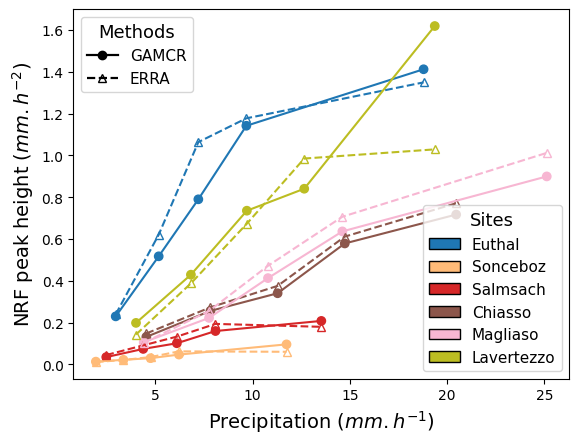

In [17]:
from get_data_from_ERRA import *
mode = 'training'
dicERRAlocal = get_data_from_ERRA(mode=mode)
show_vs_precip_intensity(path, all_GISID, weighted=True, log_ordo=False, dataERRA=dicERRAlocal, show_GAMCR=True, stats2show=['peak'], figsave=os.path.join(path, 'NRF_peak.png'), results_name_folder='results_{0}_paper_allprecip'.format(mode))

In [5]:
from get_feat_space import *
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load feature space and GISID list
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)
for ii, GISID in enumerate(all_GISID):
    # Load data
    df = pd.read_csv(os.path.join(path, GISID, f'data_{GISID}.txt'))
    idxs = filter_dates(df['date'].to_numpy(), GISID)
    Qtrue = df.iloc[idxs]['q'].to_numpy()
    Qtrue *= 3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)
    print(GISID, dffeat.loc[GISID, 'EZG '])

44 58.7
48 125.7
50 47.5
58 32.4
88 34.3
112 185.1


# Reproduced hydrographs on the test set

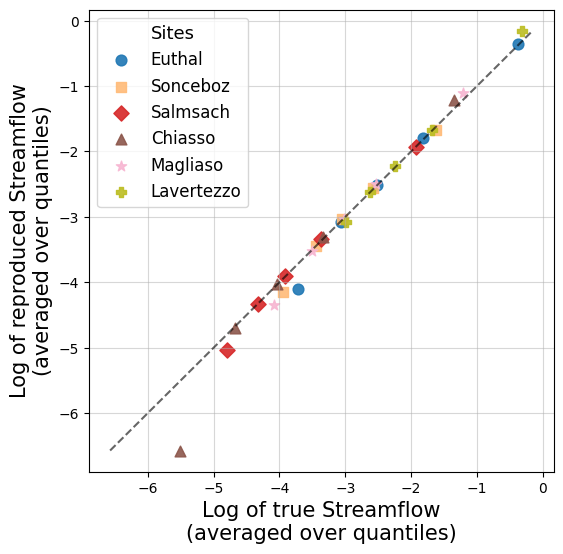

In [23]:
from get_feat_space import *
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load feature space and GISID list
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

markers = ['o', 's', 'D', '^', '*', 'P', 'X']  # Markers for GISIDs (extendable for more GISIDs)


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
color_map = plt.cm.tab20
colors = [color_map(i / len(all_GISID)) for i in range(len(all_GISID))]
K = 5  # Number of quantiles

mini = 10000
maxi = -1000
for ii, GISID in enumerate(all_GISID):
    # Load data
    df = pd.read_csv(os.path.join(path, GISID, f'data_{GISID}.txt'))
    idxs = filter_dates(df['date'].to_numpy(), GISID)
    Qtrue = df.iloc[idxs]['q'].to_numpy()
    Qtrue *= 3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)
    Qhat = np.load(os.path.join(path, GISID, 'results_all_data_paper', 'predicted_streamflow.npy')).reshape(-1)
    dates = np.load(os.path.join(path, GISID, 'results_all_data_paper', 'dates.npy')).reshape(-1)
    dates = [GAMCR.fractional_year_to_datetime(date) for date in dates]
    idxs = filter_dates(dates, GISID)
    Qhat = Qhat[idxs]
    
    # Get corresponding quantiles
    quantile_edges = np.linspace(0, 1, K + 1)
    quantile_bins = np.quantile(Qtrue, quantile_edges)
    Qtrue_avg = []
    Qhat_avg = []

    for k in range(K):
        mask = (Qtrue >= quantile_bins[k]) & (Qtrue < quantile_bins[k + 1])
        Qtrue_avg.append(Qtrue[mask].mean() if mask.any() else np.nan)

        mask = (Qhat >= quantile_bins[k]) & (Qhat < quantile_bins[k + 1])
        Qhat_avg.append(Qhat[mask].mean() if mask.any() else np.nan)
    
    # Plot true vs reproduced streamflow
    axs.scatter(np.log(Qtrue_avg), np.log(Qhat_avg), color=colors[ii], label=GISID2name[GISID], marker=markers[ii], s=60, alpha=0.9)

    mini_temp = min([np.min(np.log(Qtrue_avg)),np.min(np.log(Qhat_avg))])
    maxi_temp = max([np.max(np.log(Qtrue_avg)),np.max(np.log(Qhat_avg))])
    mini = min([mini,mini_temp])
    maxi = max([maxi,maxi_temp])

axs.plot([mini,maxi],[mini,maxi], color='black', linestyle='--', alpha=0.6)


gisid_legend = axs.legend(loc='upper left', fontsize=12, title="Sites", title_fontsize=13, frameon=True)

# Labels and formatting
axs.set_xlabel('Log of true Streamflow\n(averaged over quantiles)', fontsize=15)
axs.set_ylabel('Log of reproduced Streamflow\n(averaged over quantiles)', fontsize=15)
axs.grid(alpha=0.5)

# Save figure
plt.savefig(os.path.join(path, 'true_vs_reproduced_streamflow_quantiles.png'), dpi=200, bbox_inches='tight')
plt.show()

8808 8808
10272 10272
10296 10296
10296 10296
11784 11784
9552 9552


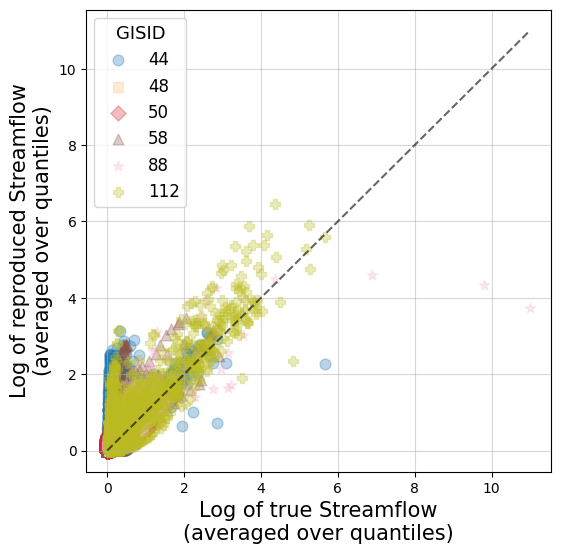

In [142]:
from get_feat_space import *
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load feature space and GISID list
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

markers = ['o', 's', 'D', '^', '*', 'P', 'X']  # Markers for GISIDs (extendable for more GISIDs)


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
color_map = plt.cm.tab20
colors = [color_map(i / len(all_GISID)) for i in range(len(all_GISID))]
K = 5  # Number of quantiles

mode = ''

mini = 10000
maxi = -1000
for ii, GISID in enumerate(all_GISID):
    # Load data
    df = pd.read_csv(os.path.join(path, GISID, f'data_{GISID}.txt'))
    idxs = filter_dates(df['date'].to_numpy(), GISID)
    Qtrue = df.iloc[idxs]['q'].to_numpy()
    J = df.iloc[idxs]['p'].to_numpy()
    Qtrue *= 3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)
    Qhat = np.load(os.path.join(path, GISID, 'results_all_data_paper', 'predicted_streamflow.npy')).reshape(-1)
    dates = np.load(os.path.join(path, GISID, 'results_all_data_paper', 'dates.npy')).reshape(-1)
    dates = [GAMCR.fractional_year_to_datetime(date) for date in dates]
    idxs = filter_dates(dates, GISID)
    Qhat = Qhat[idxs]
    Qtrue = Qtrue[:-1]
    J = J[:-1]
    print(len(Qhat), len(Qtrue))
    # Plot true vs reproduced streamflow
    if mode=='log':
        idxs = np.where(J>=1)
        Qhat = Qhat[idxs]
        Qtrue = Qtrue[idxs]

        idxs = np.where(Qtrue>=1e-3)
        Qhat = Qhat[idxs]
        Qtrue = Qtrue[idxs]
        axs.scatter(np.log10(Qtrue), np.log10(Qhat), color=colors[ii], label=f'{GISID}', marker=markers[ii], s=60, alpha=0.3)
        eps = 1e-5
        mini_temp = min([np.min(np.log10(Qtrue+eps)),np.min(np.log10(Qhat+eps))])
        maxi_temp = max([np.max(np.log10(Qtrue+eps)),np.max(np.log10(Qhat+eps))])
    else:
        axs.scatter(Qtrue, Qhat, color=colors[ii], label=f'{GISID}', marker=markers[ii], s=60, alpha=0.3)
        mini_temp = min([np.min((Qtrue)),np.min((Qhat))])
        maxi_temp = max([np.max((Qtrue)),np.max((Qhat))])
    mini = min([mini,mini_temp])
    maxi = max([maxi,maxi_temp])

axs.plot([mini,maxi],[mini,maxi], color='black', linestyle='--', alpha=0.6)


gisid_legend = axs.legend(loc='upper left', fontsize=12, title="GISID", title_fontsize=13, frameon=True)

# Labels and formatting
axs.set_xlabel('Log of true Streamflow\n(averaged over quantiles)', fontsize=15)
axs.set_ylabel('Log of reproduced Streamflow\n(averaged over quantiles)', fontsize=15)
axs.grid(alpha=0.5)

# Save figure
plt.savefig(os.path.join(path, 'true_vs_reproduced_streamflow_all_data.png'), dpi=200, bbox_inches='tight')
plt.show()

8808 8808
10272 10272
10296 10296
10296 10296
11784 11784
9552 9552


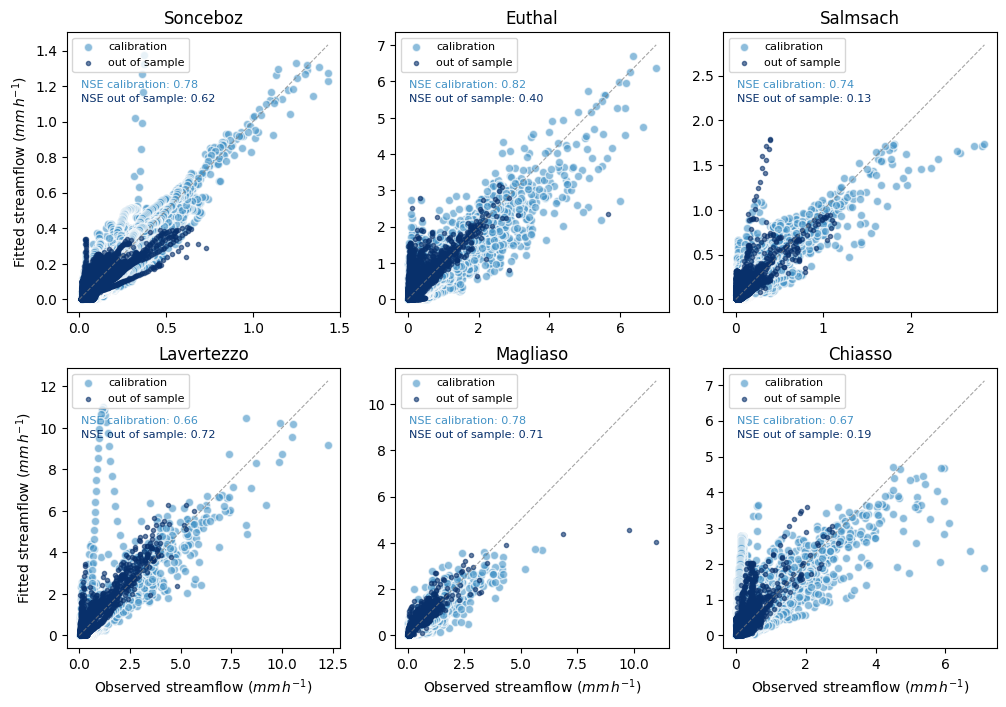

In [49]:
from get_feat_space import *
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load feature space and GISID list
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

markers = ['o', 's', 'D', '^', '*', 'P', 'X']  # Markers for GISIDs (extendable for more GISIDs)


color_map = plt.cm.tab20
colors = [color_map(i / len(all_GISID)) for i in range(len(all_GISID))]
K = 5  # Number of quantiles

mode = ''

mini = 10000
maxi = -1000

fig, ax = plt.subplots(2,3, figsize=(12,8))
list_rows = [0,0,0,1,1,1]
list_cols = [1,0,2,2,1,0]
for ii, GISID in enumerate(all_GISID):
    rr = list_rows[ii]
    cc = list_cols[ii]
    # Load data
    df = pd.read_csv(os.path.join(path, GISID, f'data_{GISID}.txt'))
    dates_true = df['date'].to_numpy()
    dates_true = pd.to_datetime(dates_true)
    idxs_true = filter_dates(dates_true, GISID, all_data=True)
    Qtrue = df['q'].to_numpy()
    J = df.iloc[idxs]['p'].to_numpy()
    Qtrue *= 3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)
    Qhat = np.load(os.path.join(path, GISID, 'results_all_data_paper_allprecip', 'predicted_streamflow.npy')).reshape(-1)
    dates = np.load(os.path.join(path, GISID, 'results_all_data_paper_allprecip', 'dates.npy')).reshape(-1)
    timeyear = dates
    dates = np.array([GAMCR.fractional_year_to_datetime(date) for date in dates])
    idxs = filter_dates(dates, GISID, all_data=True)

    idxs_training = np.array([i for i in idxs if timeyear[i]<2018]).astype(int)
    dates_tr = dates[idxs_training]
    idxs_test = np.array([i for i in idxs if timeyear[i]>=2018]).astype(int)
    dates_te = dates[idxs_test]
    Qhat_tr = Qhat[idxs_training]
    Qhat_te = Qhat[idxs_test]

    # idxs_training = np.array([i for i in idxs_true if dates_true[i].year<2018]).astype(int)
    # idxs_test = np.array([i for i in idxs_true if dates_true[i].year>=2018]).astype(int)
    dates_tr_set = set(dates_tr)
    idxs_training = np.array([i for i, date in enumerate(dates_true) if date in dates_tr_set])

    dates_te_set = set(dates_te)
    idxs_test = np.array([i for i, date in enumerate(dates_true) if date in dates_te_set])
    Qtrue_tr = Qtrue[idxs_training]
    Qtrue_te = Qtrue[idxs_test]
    # J = J[:-1]
    # print(len(Qhat), len(Qtrue))
    # # Plot true vs reproduced streamflow
    # if mode=='log':
    #     idxs = np.where(J>=1)
    #     Qhat = Qhat[idxs]
    #     Qtrue = Qtrue[idxs]

    #     idxs = np.where(Qtrue>=1e-3)
    #     Qhat = Qhat[idxs]
    #     Qtrue = Qtrue[idxs]
    #     axs.scatter(np.log10(Qtrue), np.log10(Qhat), color=colors[ii], label=f'{GISID}', marker=markers[ii], s=60, alpha=0.3)
    #     eps = 1e-5
    #     mini_temp = min([np.min(np.log10(Qtrue+eps)),np.min(np.log10(Qhat+eps))])
    #     maxi_temp = max([np.max(np.log10(Qtrue+eps)),np.max(np.log10(Qhat+eps))])
    # else:
    #     axs.scatter(Qtrue, Qhat, color=colors[ii], label=f'{GISID}', marker=markers[ii], s=60, alpha=0.3)
    #     mini_temp = min([np.min((Qtrue)),np.min((Qhat))])
    #     maxi_temp = max([np.max((Qtrue)),np.max((Qhat))])
    # mini = min([mini,mini_temp])
    # maxi = max([maxi,maxi_temp])

    print(len(Qtrue_te), len(Qhat_te))

    maxi = np.max([np.max(Qtrue_tr),np.max(Qtrue_te),np.max(Qhat_tr),np.max(Qhat_te)])

    ax[rr,cc].plot([0,maxi],[0,maxi], color='grey', linestyle='dashed', alpha=0.7, lw=0.8)
    ax[rr,cc].scatter(Qtrue_tr, Qhat_tr, marker='o', label='calibration', alpha=0.6, color='#4292c6', ec='white')
    ax[rr,cc].scatter(Qtrue_te, Qhat_te, marker='.', label='out of sample', alpha=0.6, color='#08306b' )
    ax[rr,cc].set_title(r'{}'.format(GISID2name[GISID]))

    # Add Nash coefficients
    nse_train = nse(Qtrue_tr, Qhat_tr)
    nse_test = nse(Qtrue_te, Qhat_te)
    ax[rr, cc].text(0.05, 0.8, f'NSE calibration: {nse_train:.2f}', transform=ax[rr, cc].transAxes, fontsize=8, color='#4292c6')
    ax[rr, cc].text(0.05, 0.75, f'NSE out of sample: {nse_test:.2f}', transform=ax[rr, cc].transAxes, fontsize=8, color='#08306b')


    # Showing labels just for bottom and left panels:
    if rr != max(list_rows):  
        ax[rr, cc].set_xlabel('')
    else:
        ax[rr, cc].set_xlabel(r'Observed streamflow ($mm\, h^{-1}$)')
    if cc != 0:  
        ax[rr, cc].set_ylabel('')
    else:
        ax[rr, cc].set_ylabel(r'Fitted streamflow ($mm\, h^{-1}$)')

    ax[rr,cc].legend(loc='upper left', fontsize=8)


# gisid_legend = axs.legend(loc='upper left', fontsize=12, title="GISID", title_fontsize=13, frameon=True)

# # Labels and formatting
# axs.set_xlabel('Log of true Streamflow\n(averaged over quantiles)', fontsize=15)
# axs.set_ylabel('Log of reproduced Streamflow\n(averaged over quantiles)', fontsize=15)
# axs.grid(alpha=0.5)

# # Save figure
plt.savefig(os.path.join(path, 'true_vs_reproduced_streamflow_all_data.png'), dpi=200, bbox_inches='tight')
# plt.show()

In [33]:
len(Qtrue), len(Qhat), len(dates_true)

(52872, 52872, 136585)

In [27]:
len(Qtrue_tr), len(Qhat_tr)

(47736, 44064)

# Weighted RRD without last bin of precip

In [2]:
def filter_dates(dates, all_data=False):
    dates = pd.to_datetime(dates)
    if not(all_data):
        idxsyear = np.where(np.array([date.year for date in dates])<2018)[0]
    if site == '46':
        low_month = 7
        up_month = 9
    elif site in ['3','44','112']:
        low_month = 6
        up_month = 10
    else:
        low_month = 5
        up_month = 10
    idxsmonth_low = np.where(np.array([date.month for date in dates])>=low_month)[0]
    #np.where(dates.apply(lambda x: x.month>=low_month))[0]
    #idxsmonth_up = np.where(dates.apply(lambda x: x.month<=up_month))[0]
    idxsmonth_up = np.where(np.array([date.month for date in dates])<=up_month)[0]
    if not(all_data):
        idxs = np.intersect1d(idxsyear, idxsmonth_low)
    else:
        idxs = idxsmonth_low
    idxs = np.intersect1d(idxs, idxsmonth_up)
    return idxs
    
def show_tf_without_last_bin(site_folder, site, stratif_wetness=False, weighted=True, show_CI=True, alpha=0.1, maxT=None, dataERRA=None, figname=None):
    folder = os.path.join(site_folder, "results_training_paper_allprecip")
    H_weighted_avg = np.load(os.path.join(folder, 'H_weighted_avg.npy'))
    H_avg = np.load(os.path.join(folder, 'H_avg.npy'))
    m = H_avg.shape[1]
    
    with open(os.path.join(folder, 'groups_precip.pkl'), 'rb') as handle:
        groups_precip = pickle.load(handle)
        nJ = len(groups_precip)
    with open(os.path.join(folder, 'groups_wetness.pkl'), 'rb') as handle:
        groups_wetness = pickle.load(handle)
        nQ = len(groups_wetness)
        
    with open(os.path.join(folder, 'group2p_range.pkl'), 'rb') as handle:
        group2p_range = pickle.load(handle)
    with open(os.path.join(folder, 'group2q_range.pkl'), 'rb') as handle:
        group2q_range = pickle.load(handle)
    with open(os.path.join(folder, 'group2nbpoints.pkl'), 'rb') as handle:
        group2nbpoints = pickle.load(handle)

    if stratif_wetness:
        K = nQ
    else:
        K = nJ
    try:
        H_weighted_avg_true = np.load(os.path.join(folder, 'H_weighted_avg_true.npy'))
        H_avg_true = np.load(os.path.join(folder, 'H_avg_true.npy'))
        with open(os.path.join(folder, 'group2nbpoints_true.pkl'), 'rb') as handle:
            group2nbpoints_true = pickle.load(handle)
        true_tfs = True
        tf_true = np.zeros((K,m))
        norm_true = np.zeros(K)
    except:
        true_tfs = False
        pass

    if maxT is None:
        maxT = m
    if not(dataERRA is None):
        maxT = int(np.max(dataERRA['lagtime']))
    x = np.arange(0,maxT,1)/24
    #colors = ['red', 'orange', 'green', 'cyan', 'blue']
    from matplotlib.pyplot import cm
    colors = rainbow_colors(K)
    tf = np.zeros((K,m))
    norm = np.zeros(K)
    idx2legends = ['' for k in range(K)]

    quantile2meanJ = np.zeros(nJ-1)
    df = pd.read_csv(os.path.join(site_folder, f'data_{site}.txt'))
    for j in range(nJ-1):
        low,up = group2p_range[nJ*j]
        J_j = df['p'][df['p'].apply(lambda x: (x>=low) and (x<=up))]
        quantile2meanJ[j] = np.mean(J_j)
        
    
    for j in range(nJ):
        for k in range(nQ):
            if stratif_wetness:
                idx = k
                low,up = np.round(group2q_range[nQ*j+k], 3)
                upleg = up if idx!=(nQ-1) else 'max'
                idx2legends[idx] = '{0}-{1}'.format(low,upleg)
                tit_legend = 'Antecedent wetness'
            else:
                idx = j
                low,up = np.round(group2p_range[nJ*j+k], 1)
                upleg = up if idx!=(nJ-1) else 'max'
                idx2legends[idx] = '{0}-{1}'.format(low,upleg)
                tit_legend = 'Precipitation intensity'


            if group2nbpoints[nQ*j+k]>1:
                norm[idx] += group2nbpoints[nQ*j+k]
                tf[idx,:] += H_weighted_avg[nQ*j+k,:] * group2nbpoints[nQ*j+k]
            if true_tfs:
                if group2nbpoints_true[nQ*j+k]>1:
                    norm_true[idx] += group2nbpoints_true[nQ*j+k]
                    tf_true[idx,:] += H_weighted_avg_true[nQ*j+k,:] * group2nbpoints_true[nQ*j+k]
    for idx in range(K):
        tf[idx,:] /= norm[idx]

    df = pd.read_csv(os.path.join(site_folder, f'data_{site}.txt'))
    WRRD_GAMCR = np.zeros(tf.shape[1])
    WRRD_ERRA = np.zeros(dataERRA['group2NRF'].shape[1])
    print(np.sum(df['p']<=1),norm)
    print( group2p_range)

    idxs = filter_dates(df['date'], all_data=True)
    for j in range(nJ):
        WRRD_GAMCR +=  norm[j] * tf[j,:]
        WRRD_ERRA += norm[j] * dataERRA['group2NRF'][j,:]
    WRRD_GAMCR /= (np.sum(norm)*np.mean(df['p'].iloc[idxs]))
    WRRD_ERRA /= (np.sum(norm)*np.mean(df['p'].iloc[idxs]))
    return WRRD_GAMCR, WRRD_ERRA


In [3]:
WRRD_ERRA = {}
WRRD_GAMCR = {}
for site in all_GISID:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/{0}/'.format(site)
    gamcr, erra = show_tf_without_last_bin(site_folder, site, weighted=True, dataERRA=dicERRA[site])
    WRRD_ERRA[site] = erra
    WRRD_GAMCR[site] = gamcr

128258 [1011.  324.   99.   40.   39.]
{0: [2.14472, 4.29832], 1: [2.14472, 4.29832], 2: [2.14472, 4.29832], 3: [2.14472, 4.29832], 4: [2.14472, 4.29832], 5: [4.29832, 6.45168], 6: [4.29832, 6.45168], 7: [4.29832, 6.45168], 8: [4.29832, 6.45168], 9: [4.29832, 6.45168], 10: [6.45168, 8.61413], 11: [6.45168, 8.61413], 12: [6.45168, 8.61413], 13: [6.45168, 8.61413], 14: [6.45168, 8.61413], 15: [8.61413, 11.0667], 16: [8.61413, 11.0667], 17: [8.61413, 11.0667], 18: [8.61413, 11.0667], 19: [8.61413, 11.0667], 20: [11.0667, 1000], 21: [11.0667, 1000], 22: [11.0667, 1000], 23: [11.0667, 1000], 24: [11.0667, 1000]}
129958 [1131.  390.  188.   85.  110.]
{0: [1.37502, 2.76181], 1: [1.37502, 2.76181], 2: [1.37502, 2.76181], 3: [1.37502, 2.76181], 4: [1.37502, 2.76181], 5: [2.76181, 4.15425], 6: [2.76181, 4.15425], 7: [2.76181, 4.15425], 8: [2.76181, 4.15425], 9: [2.76181, 4.15425], 10: [4.15425, 5.55033], 11: [4.15425, 5.55033], 12: [4.15425, 5.55033], 13: [4.15425, 5.55033], 14: [4.15425, 5.550

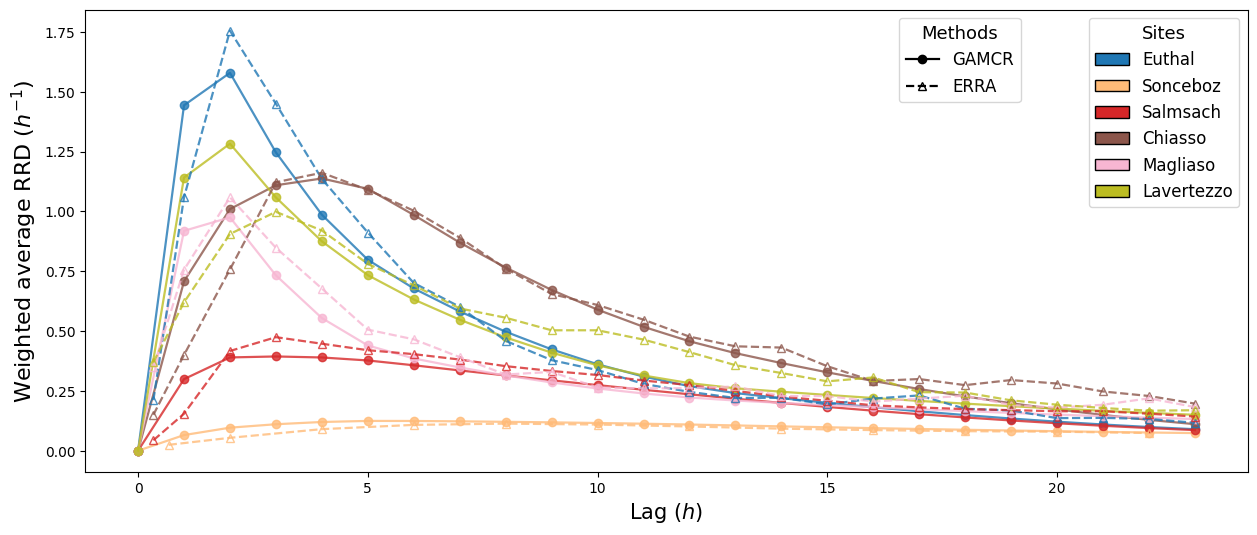

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

linewidth = 1.6
color_map = plt.cm.tab20  # Use tab20 colormap for distinct colors
markers = {'GAMCR': 'o', 'ERRA': '^'}  # Define markers for methods
colors = [color_map(i / len(all_GISID)) for i in range(len(all_GISID))]  # Generate colors

# Create legend patches for GISIDs
legend_patches = []

for method in ['GAMCR', 'ERRA']:
    for ii, GISID in enumerate(all_GISID):
        
        ########## Transfer functions
        maxlag = int(24 * 1)
        lagsERRA = dicERRA[GISID]['lagtime_RRD']
        if lagsERRA[-1] <= maxlag:
            idx_erra = len(lagsERRA)
        else:
            idx_erra = np.where(lagsERRA <= maxlag)[0][-1]

        # Plot the curves with unique colors per GISID and method-specific styles
        if log_mode:
            if method == 'GAMCR':
                axs.plot([i  for i in range(maxlag)], np.log(WRRD_GAMCR[GISID][:maxlag]), 
                         color=colors[ii], lw=1.3, marker=markers[method], alpha=0.8)
            else:
                axs.plot(dicERRA[GISID]['lagtime_RRD'][:idx_erra] , 
                         np.log(WRRD_ERRA[GISID][:idx_erra]), 
                         color=colors[ii], lw=0.9, linestyle='--', fillstyle='none', marker=markers[method], alpha=0.8)
        else:
            if method == 'GAMCR':
                axs.plot([i  for i in range(maxlag)], WRRD_GAMCR[GISID][:maxlag], 
                         color=colors[ii], lw=linewidth, marker=markers[method], alpha=0.8)
            else:
                axs.plot(dicERRA[GISID]['lagtime_RRD'][:idx_erra] , 
                         WRRD_ERRA[GISID][:idx_erra], 
                         color=colors[ii], linestyle='--', lw=linewidth, fillstyle='none', marker=markers[method], alpha=0.8)
        
        # Add a patch for each GISID if not already added
        if len(legend_patches) < len(all_GISID):
            legend_patches.append(Patch(facecolor=colors[ii], edgecolor='black', label=GISID2name[GISID]))

    
# Add the GISID color blocks to the legend
gisid_legend = axs.legend(handles=legend_patches, loc='upper right',  title='Sites', fontsize=12, title_fontsize=13)

method_legend_lines = [
    Line2D([0], [0], color='black', lw=linewidth, marker=markers['GAMCR'], label='GAMCR'),
    Line2D([0], [0], color='black', linestyle='--', lw=linewidth, fillstyle='none', marker=markers['ERRA'], label='ERRA')
]
method_legend = axs.legend(handles=method_legend_lines, loc=(0.7,0.8), fontsize=12, title="Methods", title_fontsize=13)
axs.add_artist(gisid_legend)  # Add GISID legend manually so it doesn't get overwritten


plt.xlabel('Lag ($h$)', fontsize=15)
plt.ylabel('Weighted average RRD ($h^{-1}$)', fontsize=16)

plt.savefig(os.path.join(path, 'all_sites_with_last_bin.png'), dpi=200, bbox_inches='tight')

In [88]:
def show_tf_p_or_q(site_folder, site, stratif_wetness=True, weighted=True, show_CI=True, alpha=0.1, maxT=None, dataERRA=None, figname=None):
    folder = os.path.join(site_folder, "results_minprecip")
    H_weighted_avg = np.load(os.path.join(folder, 'H_weighted_avg.npy'))
    H_avg = np.load(os.path.join(folder, 'H_avg.npy'))
    m = H_avg.shape[1]
    
    with open(os.path.join(folder, 'groups_precip.pkl'), 'rb') as handle:
        groups_precip = pickle.load(handle)
        nJ = len(groups_precip)
    with open(os.path.join(folder, 'groups_wetness.pkl'), 'rb') as handle:
        groups_wetness = pickle.load(handle)
        nQ = len(groups_wetness)
        
    with open(os.path.join(folder, 'group2p_range.pkl'), 'rb') as handle:
        group2p_range = pickle.load(handle)
    with open(os.path.join(folder, 'group2q_range.pkl'), 'rb') as handle:
        group2q_range = pickle.load(handle)
    with open(os.path.join(folder, 'group2nbpoints.pkl'), 'rb') as handle:
        group2nbpoints = pickle.load(handle)

    if stratif_wetness:
        K = nQ
    else:
        K = nJ
    try:
        H_weighted_avg_true = np.load(os.path.join(folder, 'H_weighted_avg_true.npy'))
        H_avg_true = np.load(os.path.join(folder, 'H_avg_true.npy'))
        with open(os.path.join(folder, 'group2nbpoints_true.pkl'), 'rb') as handle:
            group2nbpoints_true = pickle.load(handle)
        true_tfs = True
        tf_true = np.zeros((K,m))
        norm_true = np.zeros(K)
    except:
        true_tfs = False
        pass

    if maxT is None:
        maxT = m
    if not(dataERRA is None):
        maxT = int(np.max(dataERRA['lagtime']))
    x = np.arange(0,maxT,1)/24
    #colors = ['red', 'orange', 'green', 'cyan', 'blue']
    from matplotlib.pyplot import cm
    colors = rainbow_colors(K)
    tf = np.zeros((K,m))
    norm = np.zeros(K)
    idx2legends = ['' for k in range(K)]

    for j in range(nJ):
        for k in range(nQ):
            if stratif_wetness:
                idx = k
                low,up = np.round(group2q_range[nQ*j+k], 3)
                upleg = up if idx!=(nQ-1) else 'max'
                idx2legends[idx] = '{0}-{1}'.format(low,upleg)
                tit_legend = 'Antecedent wetness'
            else:
                idx = j
                low,up = np.round(group2p_range[nJ*j+k], 1)
                upleg = up if idx!=(nJ-1) else 'max'
                idx2legends[idx] = '{0}-{1}'.format(low,upleg)
                tit_legend = 'Precipitation intensity'


            if group2nbpoints[nQ*j+k]>1:
                norm[idx] += group2nbpoints[nQ*j+k]
                tf[idx,:] += H_weighted_avg[nQ*j+k,:] * group2nbpoints[nQ*j+k]
            if true_tfs:
                if group2nbpoints_true[nQ*j+k]>1:
                    norm_true[idx] += group2nbpoints_true[nQ*j+k]
                    tf_true[idx,:] += H_weighted_avg_true[nQ*j+k,:] * group2nbpoints_true[nQ*j+k]
    for idx in range(K):
        tf[idx,:] /= norm[idx]
    for idx in range(K):
        plt.plot(x[:maxT],tf[idx,:maxT], color=colors[idx], linestyle='--')
        plt.plot([],[], color=colors[idx], label=str(idx2legends[idx]))

    methods = []
    methods_labels = []
    if true_tfs:
        for idx in range(K):
            tf_true[idx,:] /= norm_true[idx]
        for idx in range(K):
            plt.plot(x[:maxT],tf_true[idx,:maxT], color=colors[idx], linestyle='-')
        m_true, = plt.plot([],[], color='black', linestyle='-')
        methods.append(m_true)
        methods_labels.append('Ground truth')
    m_gamcr, = plt.plot([],[], color='black',  linestyle='--')
    methods.append(m_gamcr)
    methods_labels.append('GAMCR')
    if weighted:
        if not(dataERRA is None):
            for idx in range(K):
                plt.plot(dataERRA['lagtime']/24,dataERRA['group2NRF'][idx,:], color=colors[idx], linestyle=':')
            m_erra, = plt.plot([],[], color='black', linestyle=':')
            methods_labels.append('ERRA')
            methods.append(m_erra)

        plt.ylabel('NRF ($mm.h^{-2}$)', fontsize=14)
    else:
        plt.ylabel('RRD', fontsize=14)
    plt.xlabel('Lag (in days)', fontsize=14)
    first_legend = plt.gca().legend(title=tit_legend)
    plt.gca().add_artist(first_legend)

    
    legend1 = plt.legend(methods, methods_labels, loc='upper center')
    plt.gca().add_artist(legend1)

    if not(figname is None):
        plt.savefig(figname+'.png', dpi=250, bbox_inches='tight')
    else:
        plt.title("{0}".format(site))
    plt.show()

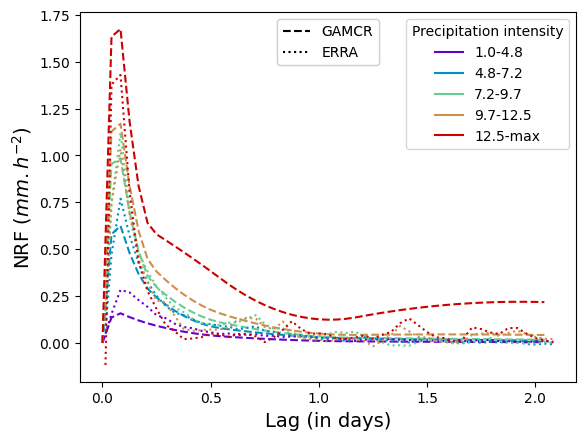

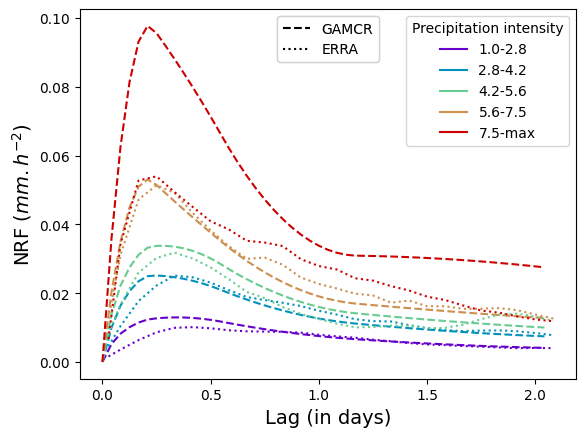

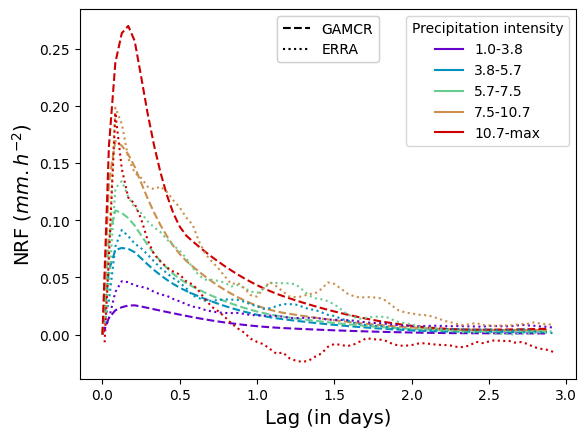

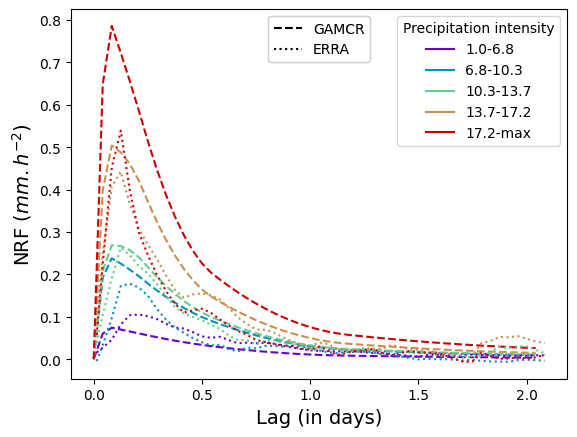

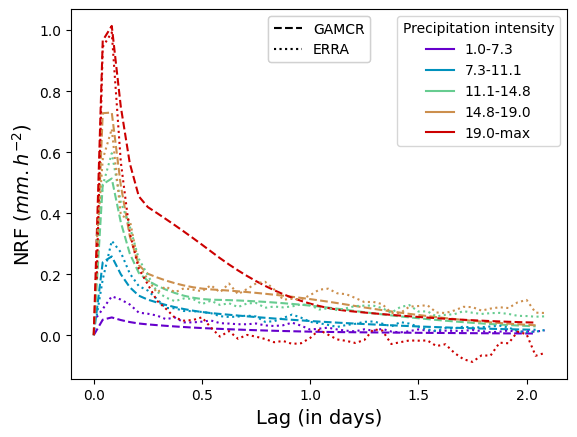

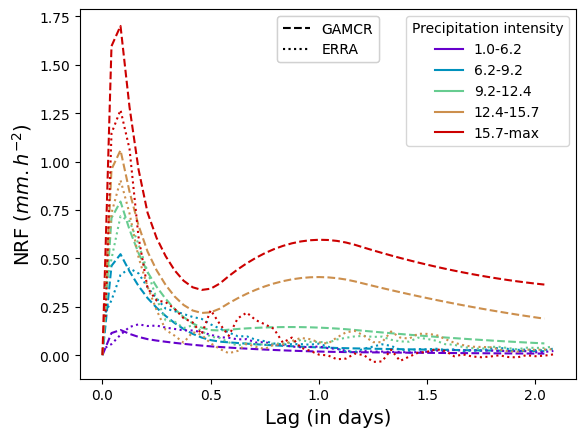

In [91]:
for site in all_GISID:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/{0}/'.format(site)
    show_tf_p_or_q(site_folder, site, stratif_wetness=False, maxT=24, weighted=True, dataERRA=dicERRA[site], figname='NRF_quantiles_{0}'.format(site))

# Hydrographs

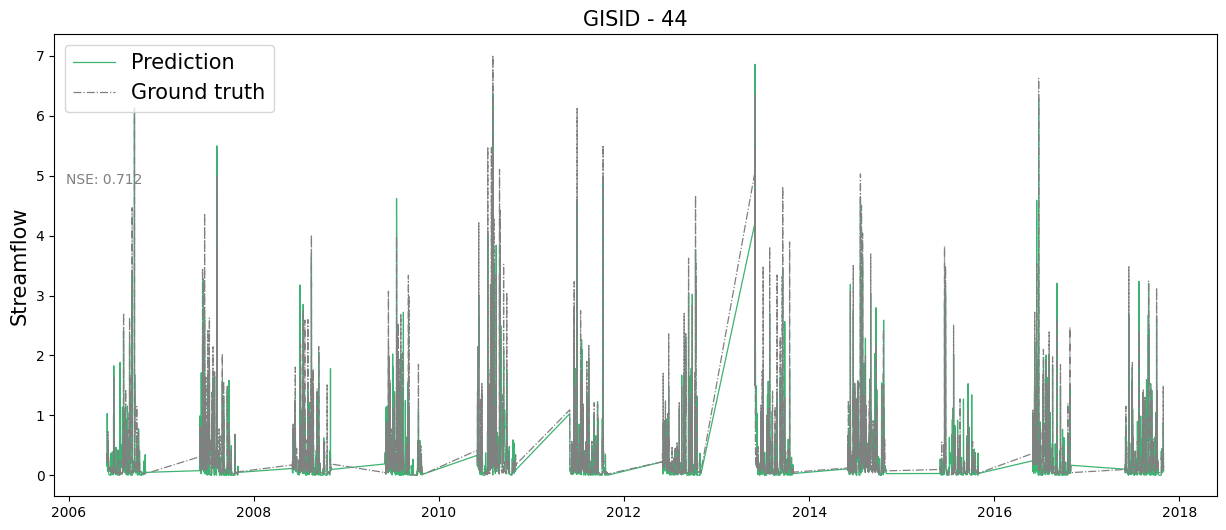

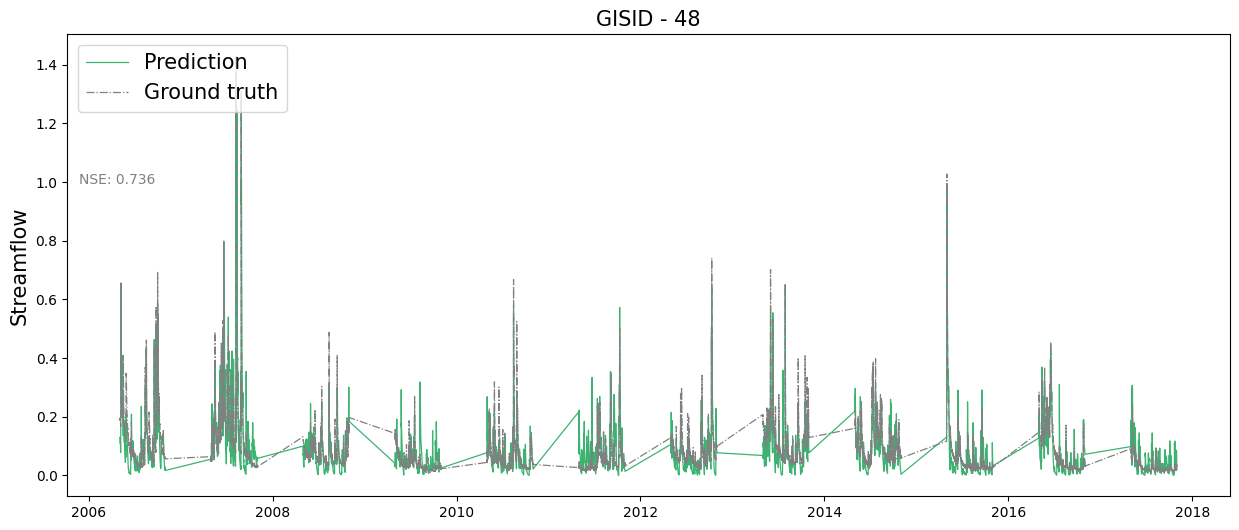

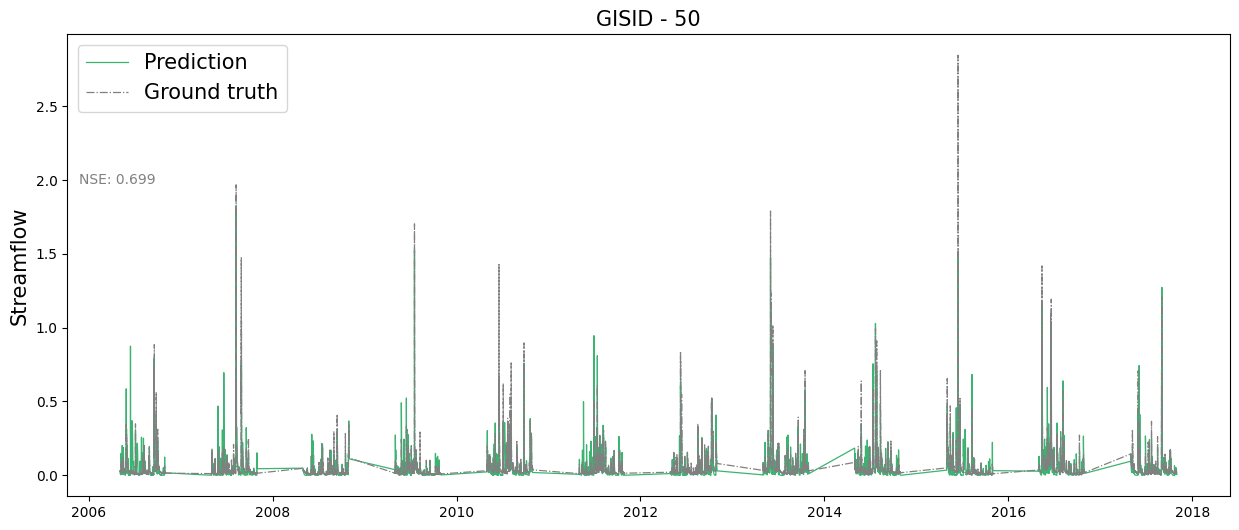

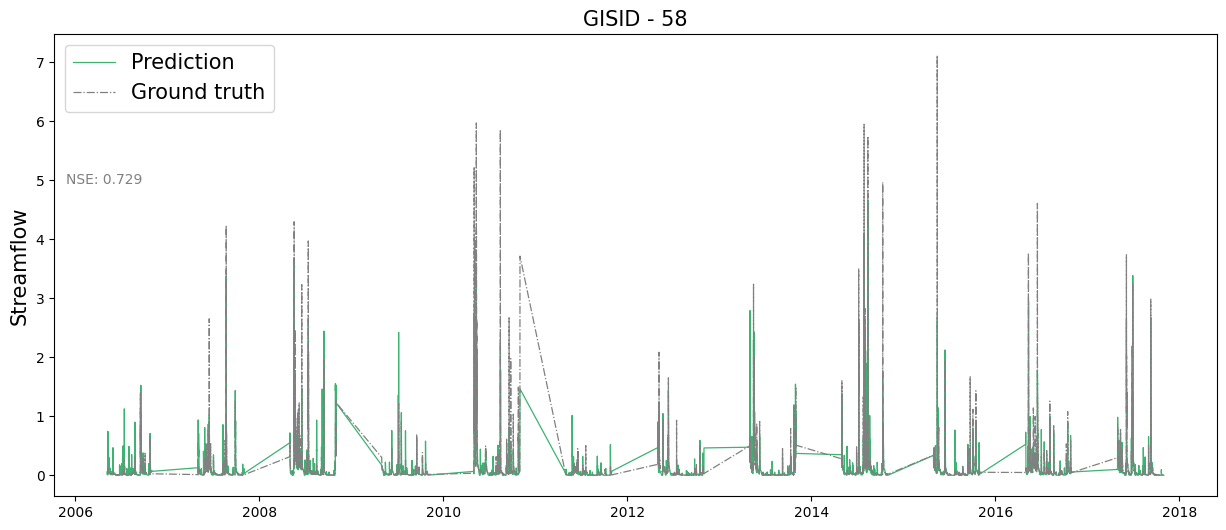

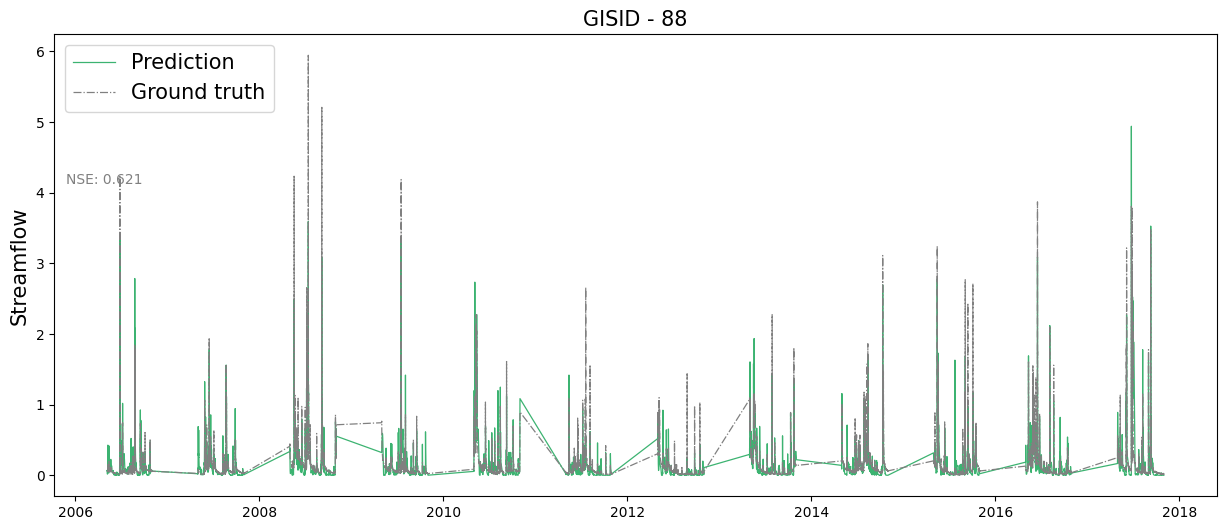

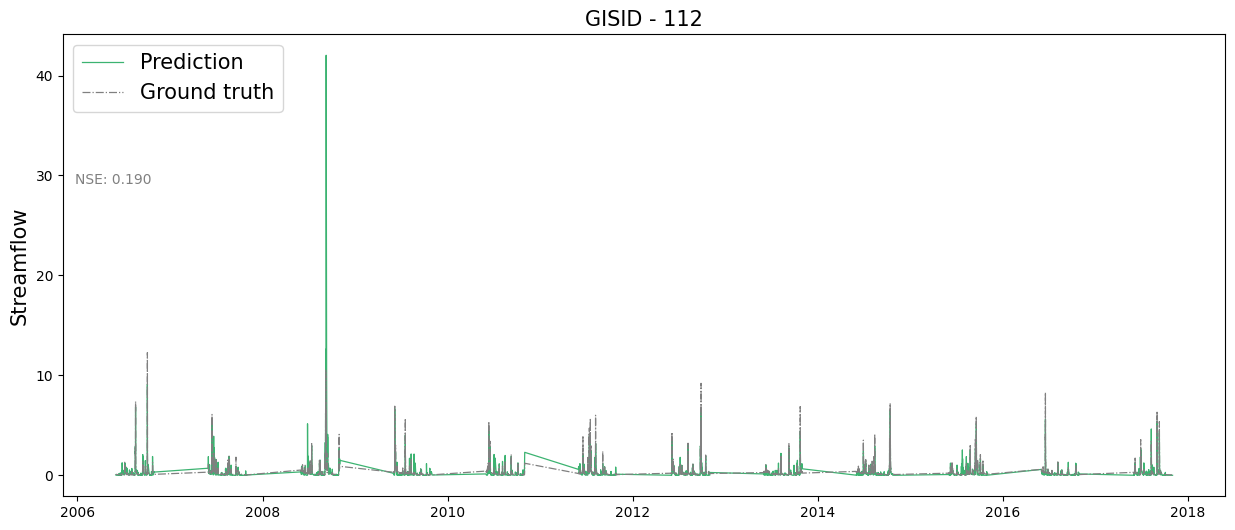

In [81]:
from get_feat_space import *
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

for ii in range(len(all_GISID)):
    GISID = all_GISID[ii]
    fig, axs = plt.subplots(1, 1, figsize=(15,6))
    df = pd.read_csv(os.path.join(path, GISID, 'data_'+GISID+'.txt'))
    Qtrue = df['q'].to_numpy()
    
    Qtrue *=  3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)  
    
    dates_true = df['timeyear'].to_numpy()
    Qhat = np.load(os.path.join(path, GISID, 'results_minprecip', 'predicted_streamflow.npy')).reshape(-1)
    
    dates = np.load(os.path.join(path, GISID, 'results_minprecip', 'dates.npy')).reshape(-1)

    idxs = []
    for date in dates:
        start_idx = np.argmin(np.abs(dates_true-date))
        idxs.append(start_idx)
    Qtrue = Qtrue[idxs]
    
    
    #idxs = np.where(dates>=2018)[0]
    idxs = filter_dates([GAMCR.fractional_year_to_datetime(date) for date in dates], GISID)
    ########## Streamflow time series
    # Estimated streamflow using the model trained on the site considered
    axs.plot(dates, Qhat, label='Prediction', lw=0.9, color='mediumseagreen')
    axs.plot(dates, Qtrue, label='Ground truth', lw=0.9, linestyle='-.', color='grey')
    axs.legend(loc='upper left', fontsize=15)
    plt.title('GISID - {0}'.format(GISID), fontsize=15)
    plt.ylabel('Streamflow', fontsize=15)
    plt.savefig(os.path.join(path, 'reproduced_hydrograph_training_GISID_{0}.png'.format(GISID)), dpi=200, bbox_inches='tight') 
    axs.text(.01, .70, 'NSE: {:.3f}'.format(nse( Qhat, Qtrue )), size=10,color='grey',ha='left', va='top', transform=axs.transAxes)
    plt.show()


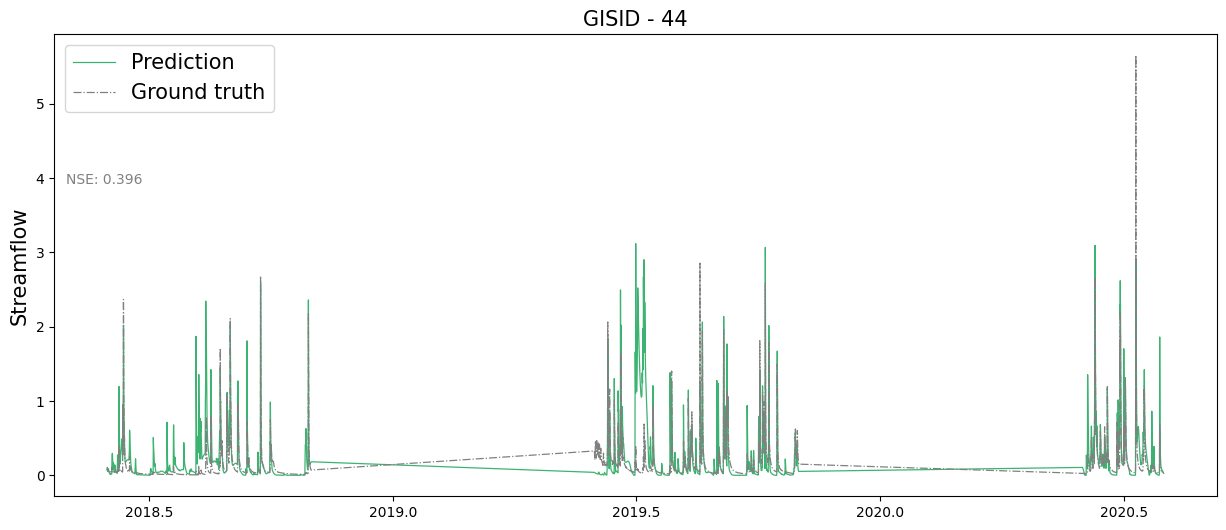

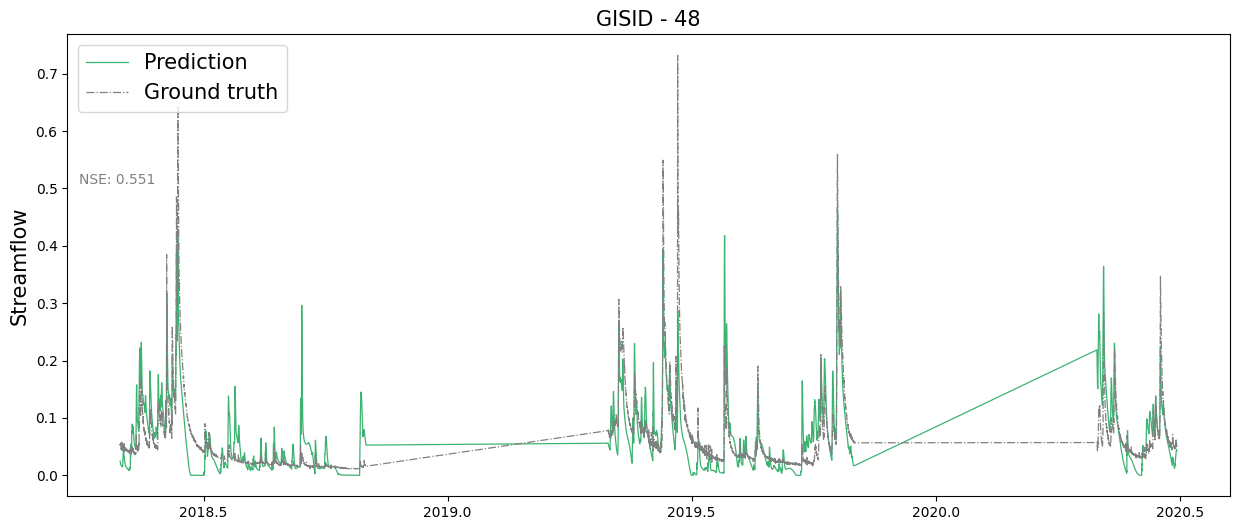

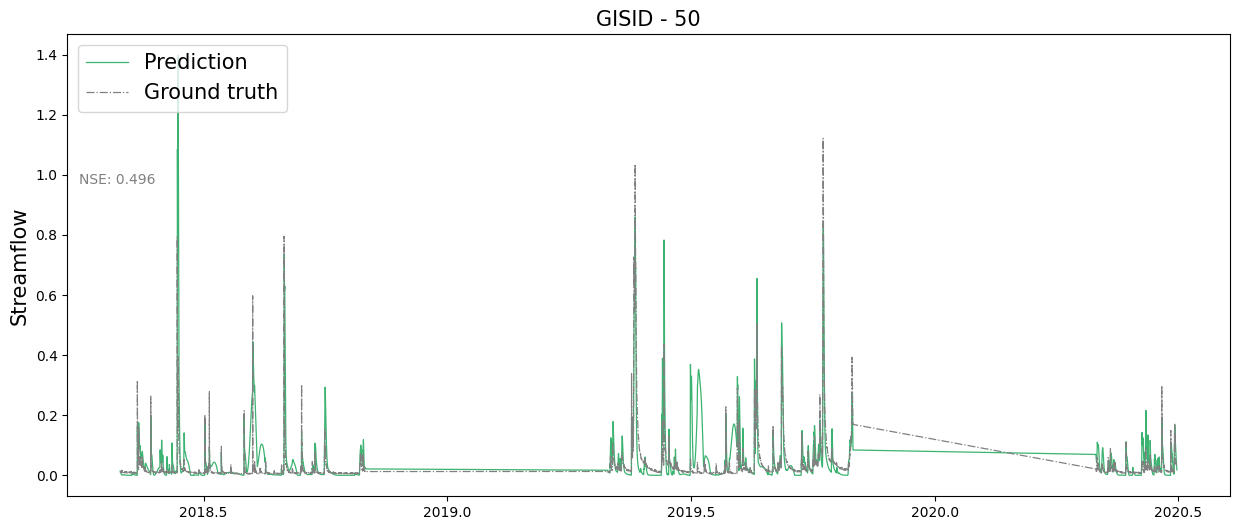

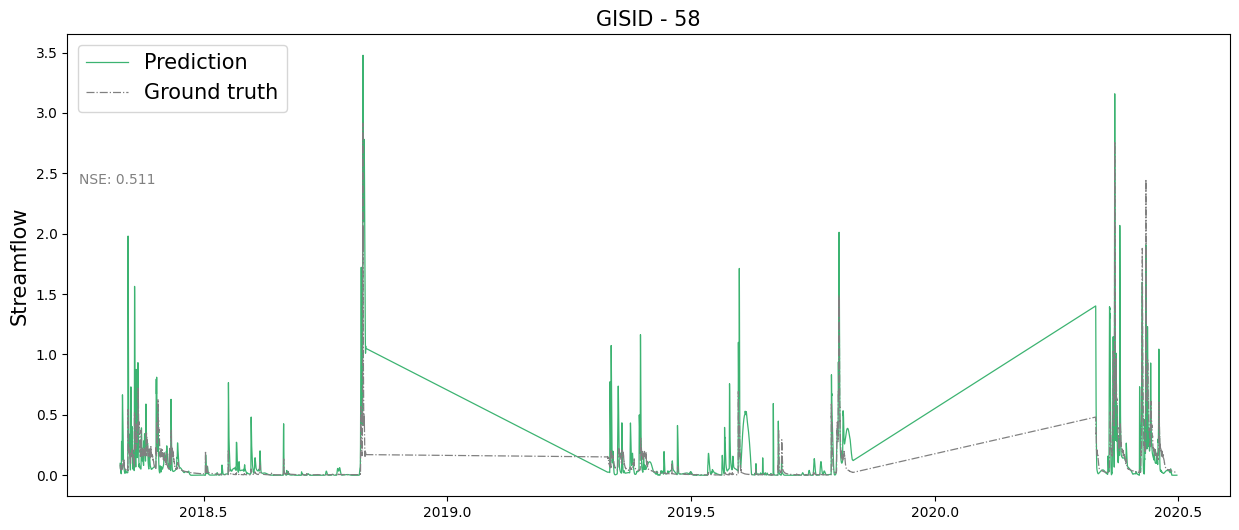

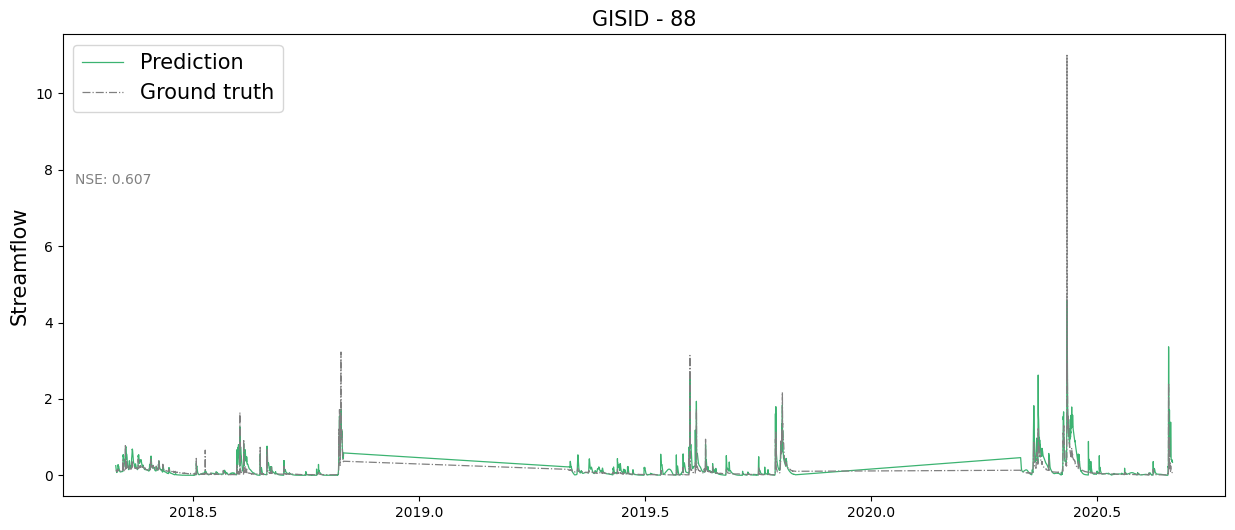

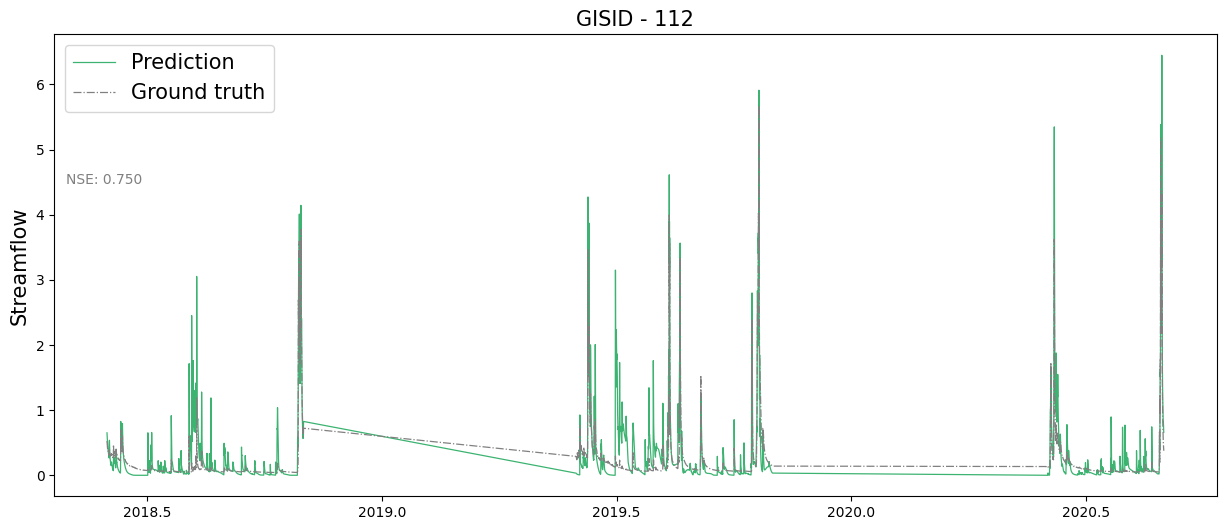

In [77]:
from get_feat_space import *
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

for ii in range(len(all_GISID)):
    GISID = all_GISID[ii]
    fig, axs = plt.subplots(1, 1, figsize=(15,6))
    df = pd.read_csv(os.path.join(path, GISID, 'data_'+GISID+'.txt'))
    idxs = filter_dates(df['date'].to_numpy(), GISID)
    Qtrue = df.iloc[idxs]['q'].to_numpy()
    
    Qtrue *=  3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)  
    
    dates_true = df.iloc[idxs]['timeyear'].to_numpy()
    Qhat = np.load(os.path.join(path, GISID, 'results_all_data', 'predicted_streamflow.npy')).reshape(-1)
    
    dates = np.load(os.path.join(path, GISID, 'results_all_data', 'dates.npy')).reshape(-1)
    
    #idxs = np.where(dates>=2018)[0]
    idxs = filter_dates([GAMCR.fractional_year_to_datetime(date) for date in dates], GISID)
    ########## Streamflow time series
    # Estimated streamflow using the model trained on the site considered
    axs.plot(dates[idxs], Qhat[idxs], label='Prediction', lw=0.9, color='mediumseagreen')
    axs.plot(dates_true, Qtrue, label='Ground truth', lw=0.9, linestyle='-.', color='grey')
    axs.legend(loc='upper left', fontsize=15)
    plt.title('GISID - {0}'.format(GISID), fontsize=15)
    plt.ylabel('Streamflow', fontsize=15)
    plt.savefig(os.path.join(path, 'reproduced_hydrograph_GISID_{0}.png'.format(GISID)), dpi=200, bbox_inches='tight') 
    axs.text(.01, .70, 'NSE: {:.3f}'.format(nse( Qhat[idxs], Qtrue[:-1] )), size=10,color='grey',ha='left', va='top', transform=axs.transAxes)
    plt.show()


In [70]:
dates_true, dates[idxs]

(array([2018.41369863, 2018.41381279, 2018.41392694, ..., 2020.58173953,
        2020.58185337, 2020.58196721]),
 array([2018.41369863, 2018.41381279, 2018.41392694, ..., 2020.58162568,
        2020.58173953, 2020.58185337]))

# LOG of the reproduced hydrographs

In [5]:
from get_feat_space import *
feat_space, all_GISID, dffeat = get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

for ii in range(len(all_GISID)):
    GISID = all_GISID[ii]
    fig, axs = plt.subplots(1, 1, figsize=(15,6))
    df = pd.read_csv(os.path.join(path, GISID, 'data_'+GISID+'.txt'))
    idxs = filter_dates(df['date'].to_numpy(), GISID)
    Qtrue = df.iloc[idxs]['q'].to_numpy()
    
    Qtrue *=  3600 * 1000 / (dffeat.loc[GISID, 'EZG '] * 1000000)  
    
    dates_true = df.iloc[idxs]['timeyear'].to_numpy()
    Qhat = np.load(os.path.join(path, GISID, 'results_all_data', 'predicted_streamflow.npy')).reshape(-1)
    
    dates = np.load(os.path.join(path, GISID, 'results_all_data', 'dates.npy')).reshape(-1)
    
    idxs = np.where(dates>2018)
    ########## Streamflow time series
    # Estimated streamflow using the model trained on the site considered
    axs.plot(dates[idxs], np.log10(Qhat[idxs]), label='Prediction', lw=0.9, color='mediumseagreen')
    axs.plot(dates_true, np.log10(Qtrue), label='Ground truth', lw=0.9, linestyle='-.', color='grey')
    axs.legend(loc='upper left', fontsize=15)
    plt.title('GISID - {0}'.format(GISID), fontsize=15)
    plt.ylabel('LOG (streamflow) ', fontsize=15)
    plt.show()
#    axs.text(.01, .70, 'NSE: {:.3f}'.format(nse( dico['Qhat'], dico['Qtrue'] )), size=10,color='grey',ha='left', va='top', transform=axs[0,0].transAxes)

/tmp/ipykernel_13053/1877181760.py:21: RuntimeWarning: divide by zero encountered in log10
  axs.plot(dates[idxs], np.log10(Qhat[idxs]), label='Prediction', lw=0.9, color='mediumseagreen')


/tmp/ipykernel_13053/1877181760.py:21: RuntimeWarning: divide by zero encountered in log10
  axs.plot(dates[idxs], np.log10(Qhat[idxs]), label='Prediction', lw=0.9, color='mediumseagreen')


# Heatmap peak height

In [47]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

def heatmap_p_q(site_folder, site, weighted=True, stat='peak_height', alpha=0.1, figname=None):
    # Load necessary data
    folder = os.path.join(site_folder, "results")
    weighted_avg = np.load(os.path.join(folder, 'H_weighted_avg.npy'))
    unweighted_avg = np.load(os.path.join(folder, 'H_avg.npy'))
    
    with open(os.path.join(folder, 'groups_precip.pkl'), 'rb') as handle:
        precip_groups = pickle.load(handle)
        num_precip = len(precip_groups)

    with open(os.path.join(folder, 'groups_wetness.pkl'), 'rb') as handle:
        wetness_groups = pickle.load(handle)
        num_wetness = len(wetness_groups)

    # Initialize heatmap
    heatmap = np.zeros((num_precip, num_wetness))
    for j in range(num_precip):
        for k in range(num_wetness):
            data = weighted_avg if weighted else unweighted_avg
            heatmap[j, k] = np.max(data[num_wetness * j + k, :])
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    im = plt.imshow(
        heatmap.T, 
        cmap='magma', 
        aspect='auto', 
        origin='lower', 
        interpolation='nearest'
    )
    cbar = plt.colorbar(im, aspect=10, shrink=0.8, pad=0.02)
    cbar.set_label('Peak height', fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    # Set axis labels and ticks
    plt.xlabel('Precipitation Intensity ($mm \, h^{-1}$)', fontsize=14)
    plt.ylabel('Antecedent Wetness', fontsize=14)
    labels = [f'{group0:.4f}-{group1:.4f}' for (group0,group1) in wetness_groups]
    labels[-1] = f'{wetness_groups[-1][0]:.1f}-max'
    plt.yticks(
        ticks=np.arange(num_wetness),
        labels=labels,
        fontsize=12,
        rotation=45
    )
    
    labels = [f'{group0:.1f}-{group1:.1f}' for (group0,group1) in precip_groups]
    labels[-1] = f'{precip_groups[-1][0]:.1f}-max'
    plt.xticks(
        ticks=np.arange(num_precip),
        labels=labels,
        fontsize=12
    )
    if not(figname is None):
        plt.savefig(figname+'.png', dpi=250, bbox_inches='tight')
    else:
        plt.title(f"Heatmap for {site} ({'NRF' if weighted else 'RRD'})", fontsize=16)
    plt.tight_layout()
    plt.show()


<>:41: SyntaxWarning: invalid escape sequence '\,'
<>:41: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_13053/2432611292.py:41: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('Precipitation Intensity ($mm \, h^{-1}$)', fontsize=14)


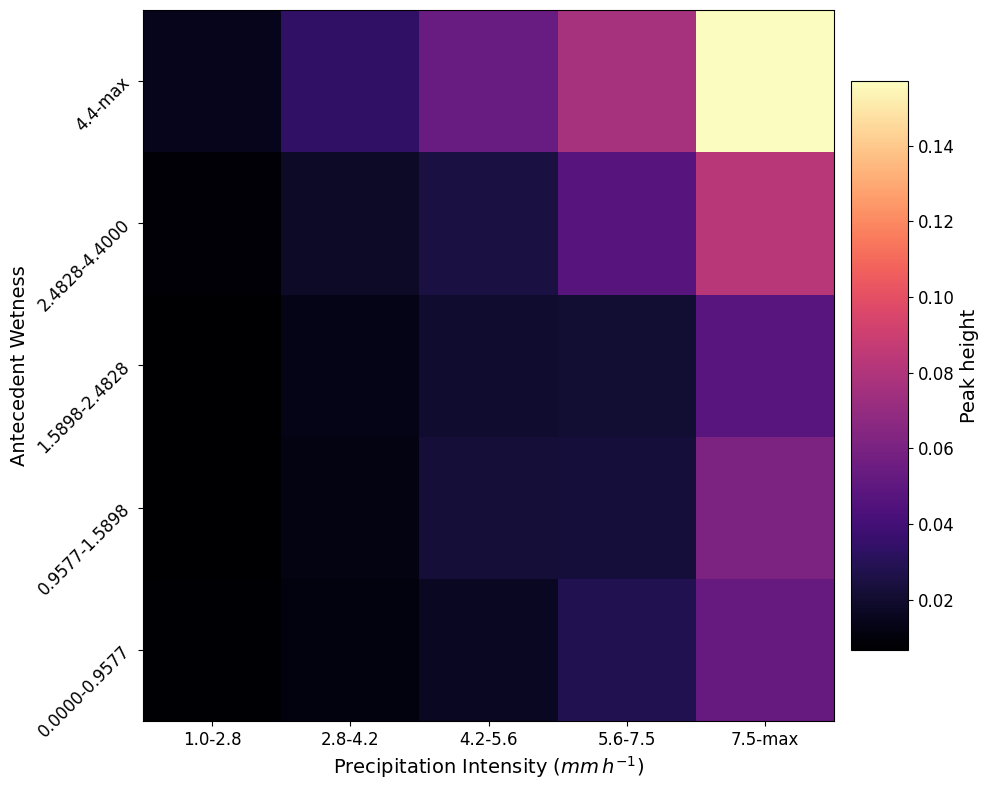

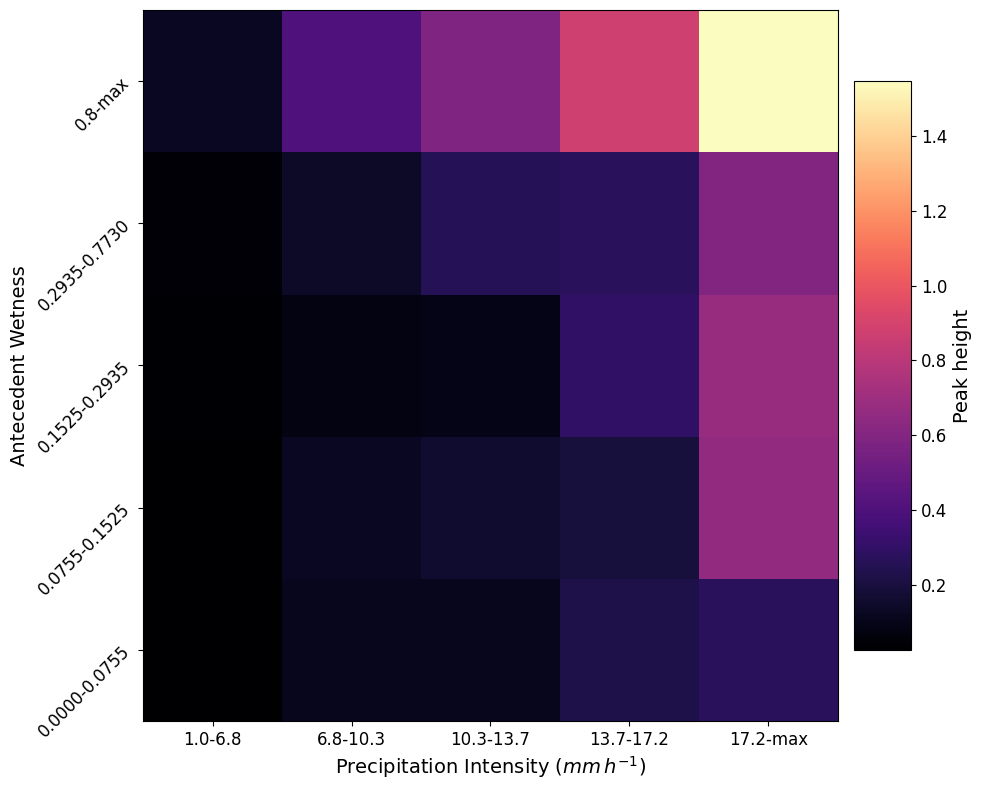

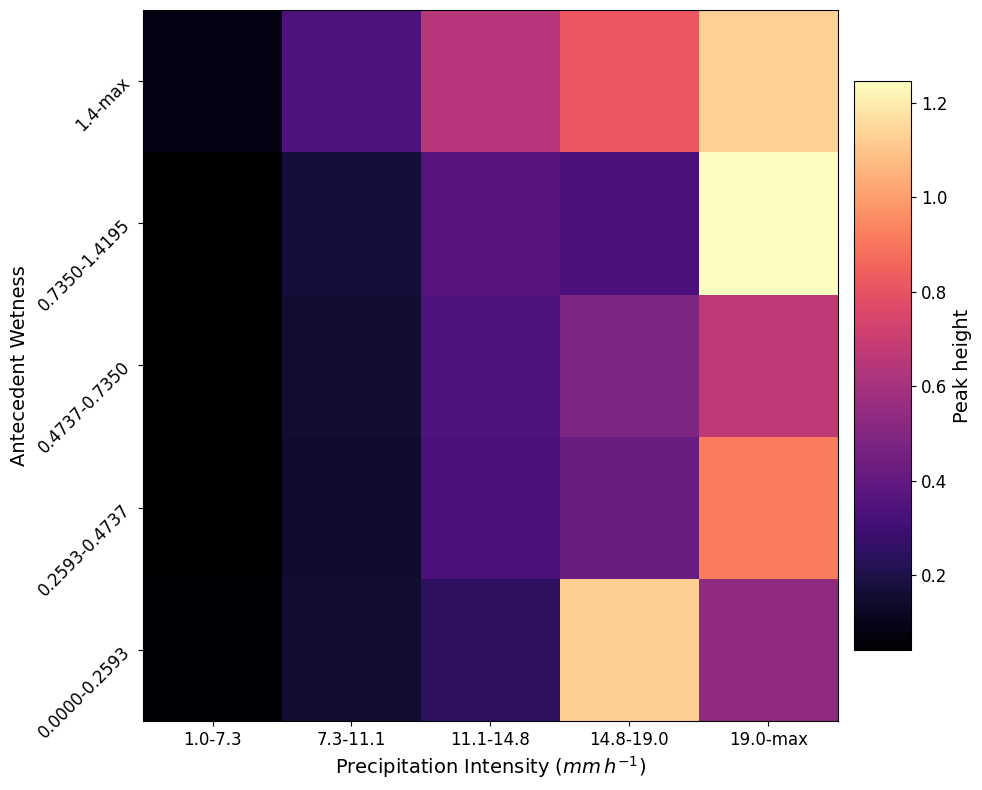

/tmp/ipykernel_13053/2432611292.py:41: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('Precipitation Intensity ($mm \, h^{-1}$)', fontsize=14)


FileNotFoundError: [Errno 2] No such file or directory: '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/112/results/H_weighted_avg.npy'

In [84]:
for site in all_GISID:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/{0}/'.format(site)
    heatmap_p_q(site_folder, site, weighted=True, figname='NRF_heatmap_peak_{0}'.format(site))

# NRF by precipitation quantiles

In [ ]:
for site in all_GISID:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper/{0}/'.format(site)
    GAMCR.resultsanalysis.show_tf_p_or_q(site_folder, site, dataERRA=dicERRA[site], stratif_wetness=False, maxT=24*10, weighted=True)#, figname='NRF_quantiles_{0}'.format(site))

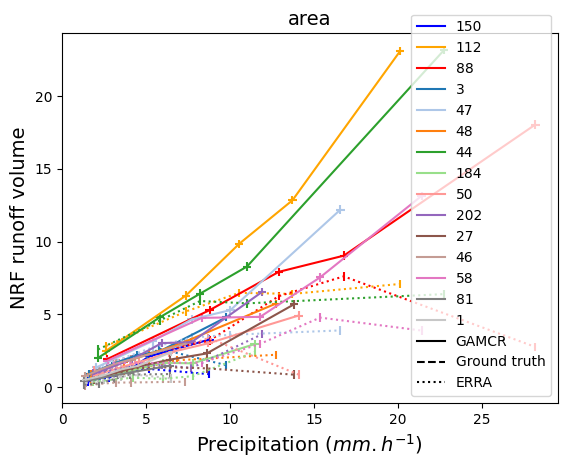

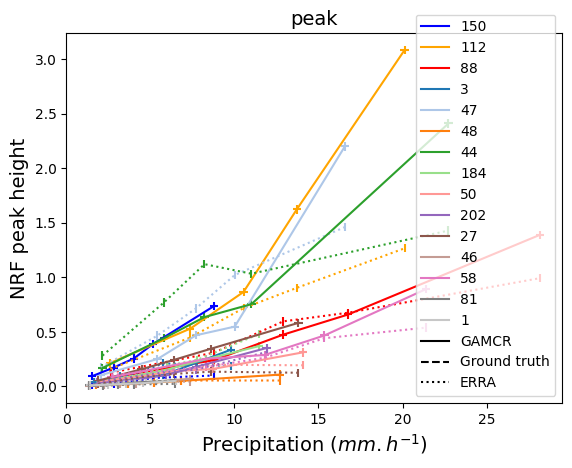

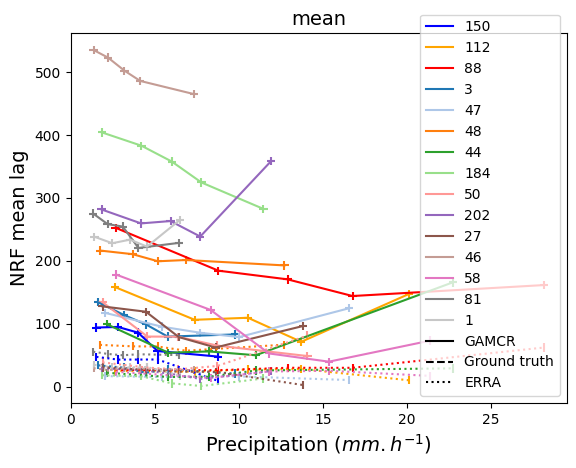

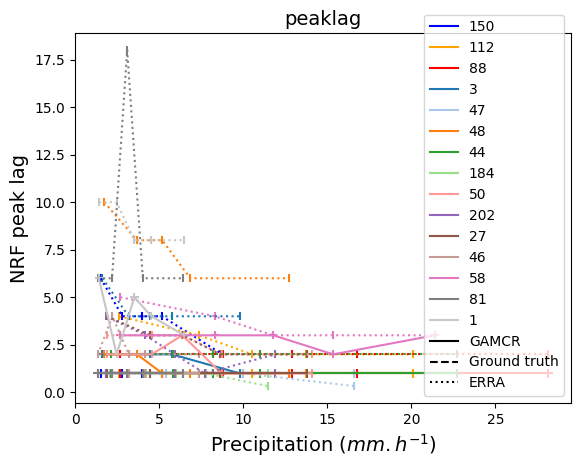

In [4]:
global_path = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper/'
GAMCR.resultsanalysis.show_vs_precip_intensity(global_path, all_GISID, weighted=True, log_ordo=False, dataERRA=dicERRA)

# Weighted average RRD site by site

In [ ]:
from datetime import datetime
for ii in range(len(all_GISID)):
    fig, axs = plt.subplots(1, 1, figsize=(15,6))


    GISID = all_GISID[ii]
    wavgRRD = np.load(os.path.join(path, GISID, 'results', 'weighted_avg_RRD.npy')).reshape(-1)

    ########## Transfer functions
    maxlag = 24*3
    lagsERRA = dicERRA[GISID]['lagtime_RRD']
    if lagsERRA[-1]<=maxlag:
        idx_erra = len(lagsERRA)
    else:
        idx_erra = np.where(lagsERRA<=maxlag)[0][-1]
    # Estimated global transfer function using the model trained on the site considered
    if log_mode:
        axs.plot([i/24 for i in range(maxlag)], np.log(wavgRRD[:maxlag]), color=colors[ii], label='GAMCR',  lw=0.9)
        axs.plot(dicERRA[GISID]['lagtime_RRD'][:idx_erra]/24, np.log(dicERRA[GISID]['wtd_avg_RRD_p'][:idx_erra]), color=colors[ii], label='ERRA', linestyle='-.', lw=0.9)
    else:
        axs.plot([i/24 for i in range(maxlag)], wavgRRD[:maxlag], color=colors[ii], label='GAMCR',  lw=0.9)
        axs.plot(dicERRA[GISID]['lagtime_RRD'][:idx_erra]/24, dicERRA[GISID]['wtd_avg_RRD_p'][:idx_erra], color=colors[ii], label='ERRA', linestyle='-.', lw=0.9)
    axs.legend(loc='upper right', fontsize=7)
    plt.title('GISID: {0}  |  Weighted average RRD'.format(GISID))
    plt.show()
# fig.text(0.71, 0.5, r'Weighted average RRD $(h^{-1})$', va='center', ha='center', rotation='vertical', fontsize=12)
# plt.legend()
    # fig.suptitle('GISID: {0}'.format(all_GISID[ii]))

    #fig.savefig(folder_ERRA+r'/GISID-{}_{}/Estimate_GISID_{}.pdf'.format(GISID,sc,GISID), bbox_inches='tight') 
    # plt.show()


In [7]:

def show_tf_p_q(site_folder, site, stratif_wetness=True, show_CI=True, weighted=True, alpha=0.1, maxT=None):
    folder = os.path.join(site_folder, "results")
    H_weighted_avg = np.load(os.path.join(folder, 'H_weighted_avg.npy'))
    H_avg = np.load(os.path.join(folder, 'H_avg.npy'))
    m = H_avg.shape[1]

    with open(os.path.join(folder, 'groups_precip.pkl'), 'rb') as handle:
        groups_precip = pickle.load(handle)
        nJ = len(groups_precip)
    with open(os.path.join(folder, 'groups_wetness.pkl'), 'rb') as handle:
        groups_wetness = pickle.load(handle)
        nQ = len(groups_wetness)
    
    with open(os.path.join(folder, 'group2p_range.pkl'), 'rb') as handle:
        group2p_range = pickle.load(handle)
    with open(os.path.join(folder, 'group2q_range.pkl'), 'rb') as handle:
        group2q_range = pickle.load(handle)
    with open(os.path.join(folder, 'group2nbpoints.pkl'), 'rb') as handle:
        group2nbpoints = pickle.load(handle)

    try:
        H_weighted_avg_true = np.load(os.path.join(folder, 'H_weighted_avg_true.npy'))
        H_avg_true = np.load(os.path.join(folder, 'H_avg_true.npy'))
        with open(os.path.join(folder, 'group2nbpoints_true.pkl'), 'rb') as handle:
            group2nbpoints_true = pickle.load(handle)
        true_tfs = True
    except:
        true_tfs = False
        pass
        

    if maxT is None:
        maxT = m
    x = np.arange(0,m,1)/24
    #colors = ['red', 'orange', 'green', 'cyan', 'blue']


    if stratif_wetness:
        K= nQ
    else:
        K = nJ
    from matplotlib.pyplot import cm
    colors = rainbow_colors(K)
    fig,a =  plt.subplots(int(np.ceil(K/2)),2)
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the super title
    idx2legend = {}
    for j in range(nJ):
        for k in range(nQ):
            if stratif_wetness:
                low, up = np.round(group2q_range[k], 3)
                upleg = up if k!=(nQ-1) else 'max'
                id_x, id_y = k//2, k%2
                a[id_x][id_y].set_title('Wetness range: {0}-{1}'.format(low,upleg))
                id_col = j
                low, up = np.round(group2p_range[nQ*j+k], 1)
                upleg = up if j!=(nJ-1) else 'max'
                title_leg = 'Precipitation range'
                idx2legend[j] = '{0}-{1}'.format(low,upleg)
            else:
                low, up = np.round(group2p_range[nQ*j+k], 1)
                upleg = up if j!=(nJ-1) else 'max'
                id_x, id_y = j//2, j%2
                a[id_x][id_y].set_title('Precipitation range: {0}-{1}'.format(low,upleg))
                id_col = k
                low, up = np.round(group2q_range[k], 3)
                upleg = up if k!=(nQ-1) else 'max'
                title_leg = 'Ant. wetness range'
                idx2legend[k] = '{0}-{1}'.format(low,upleg)
                
            if weighted:
                a[id_x][id_y].plot(x[:maxT],H_weighted_avg[nQ*j+k,:maxT], color=colors[id_col])
                if true_tfs:
                    a[id_x][id_y].plot(x[:maxT],H_weighted_avg_true[nQ*j+k,:maxT], linestyle='--', color=colors[id_col])
                a[id_x][id_y].set_ylabel('NRF', fontsize=14)
            else:
                a[id_x][id_y].plot(x[:maxT],H_avg[nQ*j+k,:maxT], color=colors[id_col])
                if true_tfs:
                    a[id_x][id_y].plot(x[:maxT],H_avg[nQ*j+k,:maxT],linestyle='--', color=colors[id_col])
                a[id_x][id_y].set_ylabel('RRD', fontsize=14)
            a[id_x][id_y].set_ylim(0,0.05)

                    
    for idx in range(K):
        try:
            plt.plot([],[], color=colors[idx], label=idx2legend[idx])
        except:
            pass
    
    fig.suptitle('{0}'.format(site))
    fig.subplots_adjust(top=0.88, hspace=0.4)
    plt.legend(title=title_leg)
    plt.show()

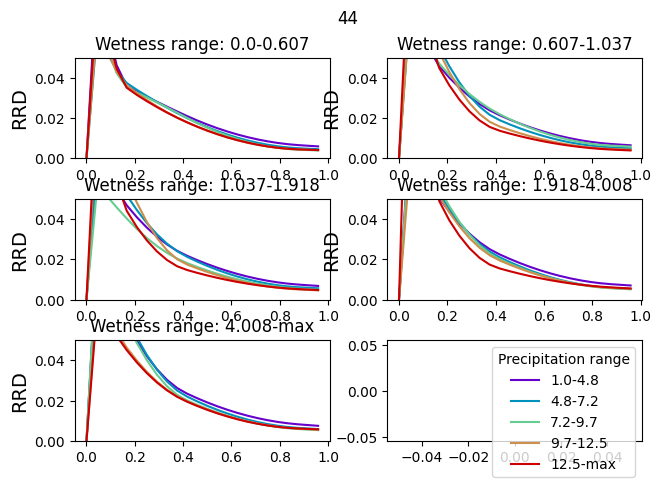

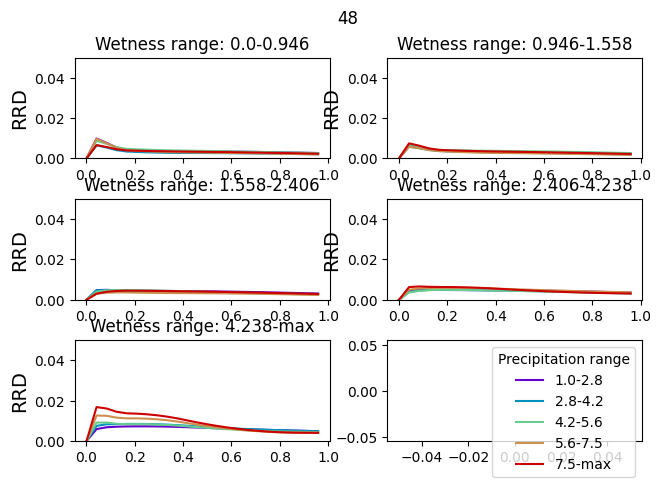

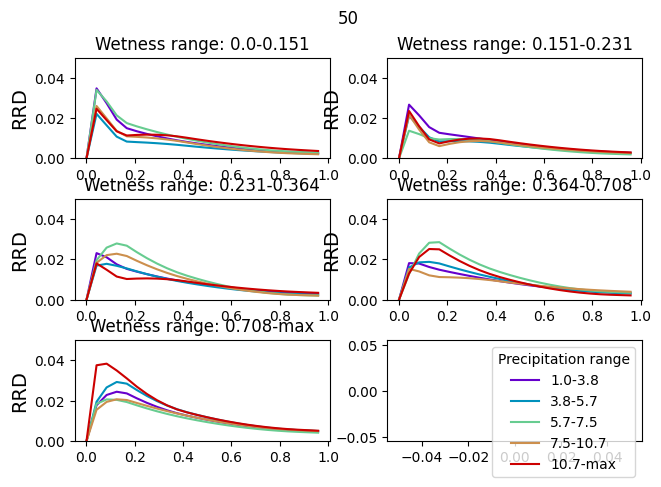

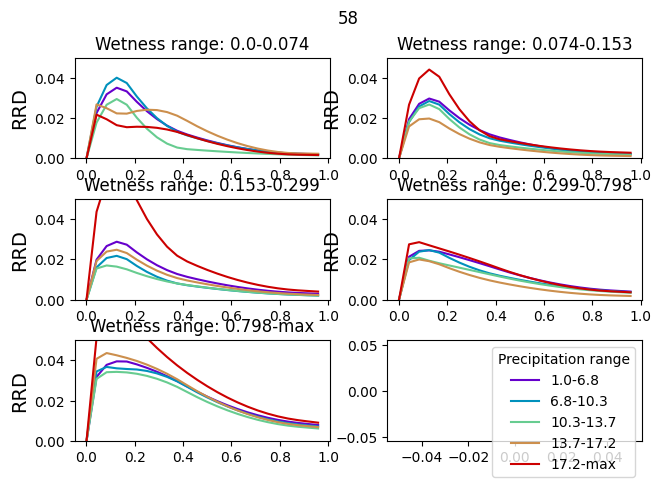

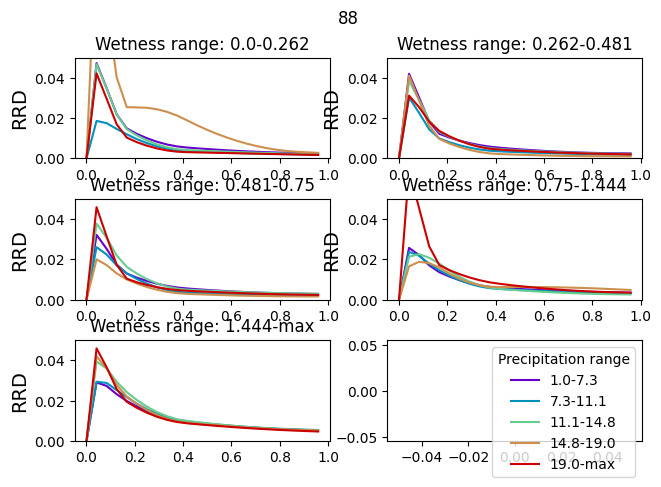

In [11]:
for site in all_GISID:
    site_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_paper_v2_seasonal/{0}/'.format(site)
    show_tf_p_q(site_folder, site, stratif_wetness=True, maxT=24, weighted=False)#, figname='NRF_quantiles_{0}'.format(site))